## Baseball Case Study

### Project Description
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

- Output: Number of predicted wins (W)
- To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

In [1]:
## Importing the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings('ignore')

In [2]:
## Importing Dataset
df = pd.read_csv('baseball.csv')

In [3]:
df.head()

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86

- From the above Dataset it is very difficult to interpret what the given Dataset means and is conveying so we will use the Wikipidea link provided to explore the independent features thoroughly

- nput features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors
- Output feature - Number of wins (W)

## Exploratory Data Analysis

In [4]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

#### Pitching statistics:

- W – Win: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work (also related: winning percentage)
- RA – Run average: number of runs allowed times nine divided by innings pitched
- ER – Earned run: number of runs that did not occur as a result of errors or passed balls
- ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched
- CG – Complete game: number of games where player was the only pitcher for their team
- SHO – Shutout: number of complete games pitched with no runs allowed
- SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings

#### Batting statistics:

- R – Runs scored: number of times a player crosses home plate
- AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction
- H – Hit: reaching base because of a batted, fair ball without error by the defense
- 2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error
- 3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
- HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error
- BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.
- K – Strike out (also abbreviated SO): number of times that a third strike is taken or swung at and missed, or bunted foul. Catcher must catch the third strike or batter may attempt to run to first base

#### Baserunning statistics:

- SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense
- R – Runs scored: times reached home plate legally and safely

#### Fielding statistics:

- E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

- Now that we have a proper knowlegde about the independent features in the Dataset we will proceed with further steps

In [5]:
df.rename(columns={'W' : 'Wins', 
                   'R' : 'Runs Scored', 
                  'AB' : 'At Bat', 
                   'H' : 'Hits', 
                  '2B' : 'Doubles', 
                  '3B' : 'Triples',
                  'HR' : 'Home Runs', 
                  'BB' : 'Base on Balls', 
                  'SO' : 'Strike Outs', 
                  'SB' : 'Stolen Base',
                  'RA' : 'Runs Average', 
                  'ER' : 'Earned Runs', 
                 'ERA' : 'Earned Run Average', 
                  'CG' : 'Complete Game',
                 'SHO' : 'Shut Outs', 
                  'SV' : 'Saves', 
                   'E' : 'Errors'},inplace=True)

df.head()

Wins  Runs Scored  At Bat  Hits  Doubles  Triples  Home Runs  \
0    95          724    5575  1497      300       42        139   
1    83          696    5467  1349      277       44        156   
2    81          669    5439  1395      303       29        141   
3    76          622    5533  1381      260       27        136   
4    74          689    5605  1515      289       49        151   

   Base on Balls  Strike Outs  Stolen Base  Runs Average  Earned Runs  \
0            383          973          104           641          601   
1            439         1264           70           700          653   
2            533         1157           86           640          584   
3            404         1231           68           701          643   
4            455         1259           83           803          746   

   Earned Run Average  Complete Game  Shut Outs  Saves  Errors  
0                3.73              2          8     56      88  
1                4.07              2         12     45      86  
2                3.67             11         10     38      79  
3                3.98              7          9     37     101  
4                4.64              7         12     35      86

- From the above Dataset we can see that 'Wins' is a our Dependent Feature and the others are the independent features that will help us in predicting the wins in every baseball game
- As the Target Feature is a Continous feature we will predict the model as Regression model

In [6]:
df.shape

(30, 17)

- The Dataset consists of 30 rows and 17 columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs Scored         30 non-null     int64  
 2   At Bat              30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Home Runs           30 non-null     int64  
 7   Base on Balls       30 non-null     int64  
 8   Strike Outs         30 non-null     int64  
 9   Stolen Base         30 non-null     int64  
 10  Runs Average        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Game       30 non-null     int64  
 14  Shut Outs           30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

- From the above we can conclude that in the 17 columns , there are 16 columns with integer Datatype and 1 column with floating Datatype so there is no need to do Encoding during model making

In [8]:
df.isnull().sum()

Wins                  0
Runs Scored           0
At Bat                0
Hits                  0
Doubles               0
Triples               0
Home Runs             0
Base on Balls         0
Strike Outs           0
Stolen Base           0
Runs Average          0
Earned Runs           0
Earned Run Average    0
Complete Game         0
Shut Outs             0
Saves                 0
Errors                0
dtype: int64

- There seem to be no NULL Values in the Dataset

#### Missing Values or Data Intergrity Check

In [9]:
## To check for any Duplicate values
df.duplicated().any()

False

- There are no Duplicate values in the Dataset

In [10]:
df.isin(['NA','N/A','-',' ','?',' ?']).sum().any()

False

- The Dataset does not contain any NULL ,Duplicate ,white spaces

In [11]:
df.describe().T

count         mean         std      min        25%  \
Wins                 30.0    80.966667   10.453455    63.00    74.0000   
Runs Scored          30.0   688.233333   58.761754   573.00   651.2500   
At Bat               30.0  5516.266667   70.467372  5385.00  5464.0000   
Hits                 30.0  1403.533333   57.140923  1324.00  1363.0000   
Doubles              30.0   274.733333   18.095405   236.00   262.2500   
Triples              30.0    31.300000   10.452355    13.00    23.0000   
Home Runs            30.0   163.633333   31.823309   100.00   140.2500   
Base on Balls        30.0   469.100000   57.053725   375.00   428.2500   
Strike Outs          30.0  1248.200000  103.759470   973.00  1157.5000   
Stolen Base          30.0    83.500000   22.815225    44.00    69.0000   
Runs Average         30.0   688.233333   72.108005   525.00   636.2500   
Earned Runs          30.0   635.833333   70.140786   478.00   587.2500   
Earned Run Average   30.0     3.956333    0.454089     2.94     3.6825   
Complete Game        30.0     3.466667    2.763473     0.00     1.0000   
Shut Outs            30.0    11.300000    4.120177     4.00     9.0000   
Saves                30.0    43.066667    7.869335    28.00    37.2500   
Errors               30.0    94.333333   13.958889    75.00    86.0000   

                         50%      75%      max  
Wins                  81.000    87.75   100.00  
Runs Scored          689.000   718.25   891.00  
At Bat              5510.000  5570.00  5649.00  
Hits                1382.500  1451.50  1515.00  
Doubles              275.500   288.75   308.00  
Triples               31.000    39.00    49.00  
Home Runs            158.500   177.00   232.00  
Base on Balls        473.000   501.25   570.00  
Strike Outs         1261.500  1311.50  1518.00  
Stolen Base           83.500    96.50   134.00  
Runs Average         695.500   732.50   844.00  
Earned Runs          644.500   679.25   799.00  
Earned Run Average     4.025     4.22     5.04  
Complete Game          3.000     5.75    11.00  
Shut Outs             12.000    13.00    21.00  
Saves                 42.000    46.75    62.00  
Errors                91.000    96.75   126.00

- There are no Visible problems in the Description of Dataset and the Difference between the Mean and Median is very Less.

In [12]:
## Checking the Skewness
df.skew()

Wins                  0.047089
Runs Scored           1.200786
At Bat                0.183437
Hits                  0.670254
Doubles              -0.230650
Triples               0.129502
Home Runs             0.516441
Base on Balls         0.158498
Strike Outs          -0.156065
Stolen Base           0.479893
Runs Average          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Complete Game         0.736845
Shut Outs             0.565790
Saves                 0.657524
Errors                0.890132
dtype: float64

- The features such as Runs Scored, Hits, Runs Average, Earned Runs, Earned Run Average, Complete Game, Saves and Errors being slightly out of this range.

- Since we are finished with checking the Data abnormalities we will proceed with Visualisation

## Data Visualisatiion

### Univariate Analysis

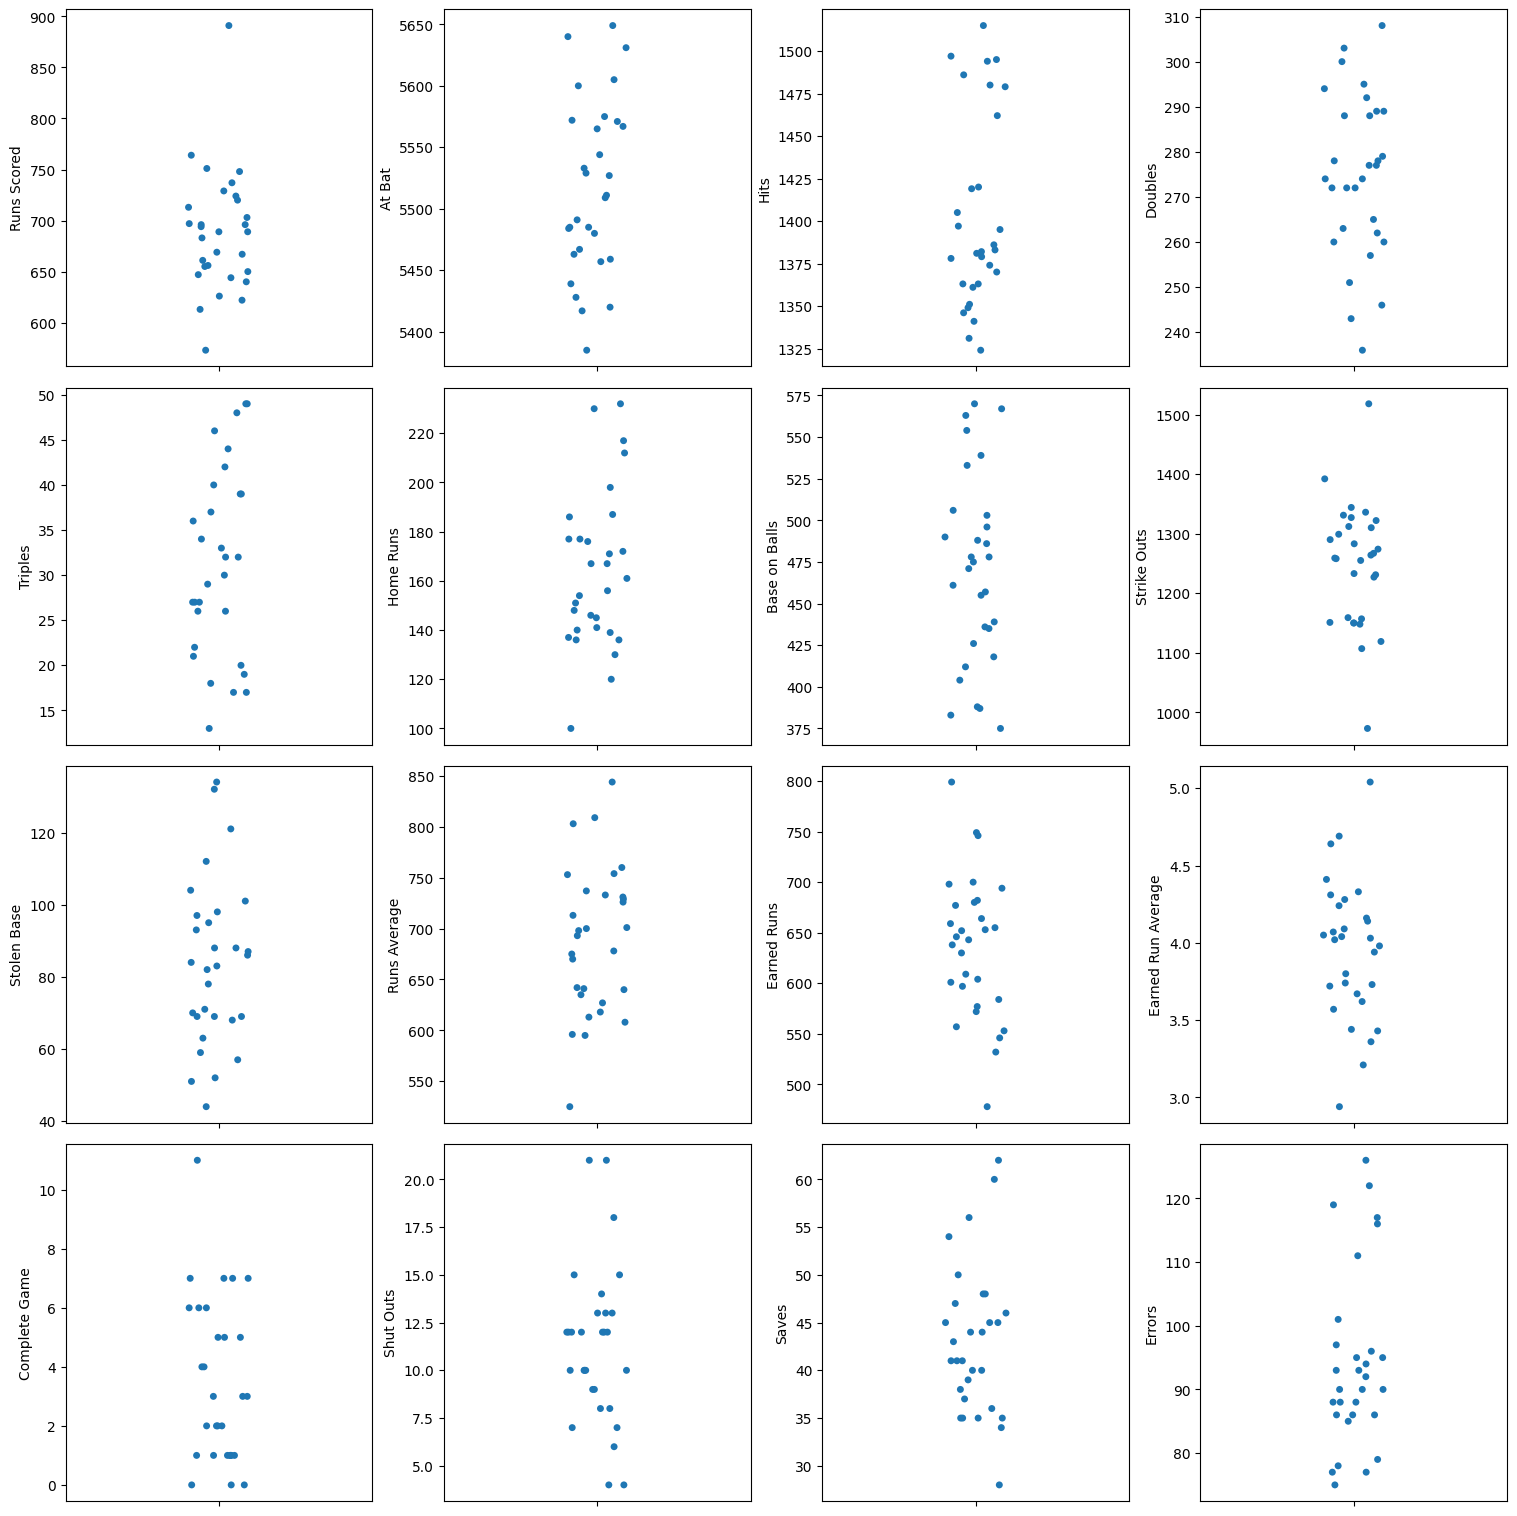

In [13]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col,value in features.items():
    sns.stripplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

- We can see columns Runs Scored, Strike Outs, Complete Game with single data points are further away from the general accumulation of Data Points and indicate the presence of Outliers

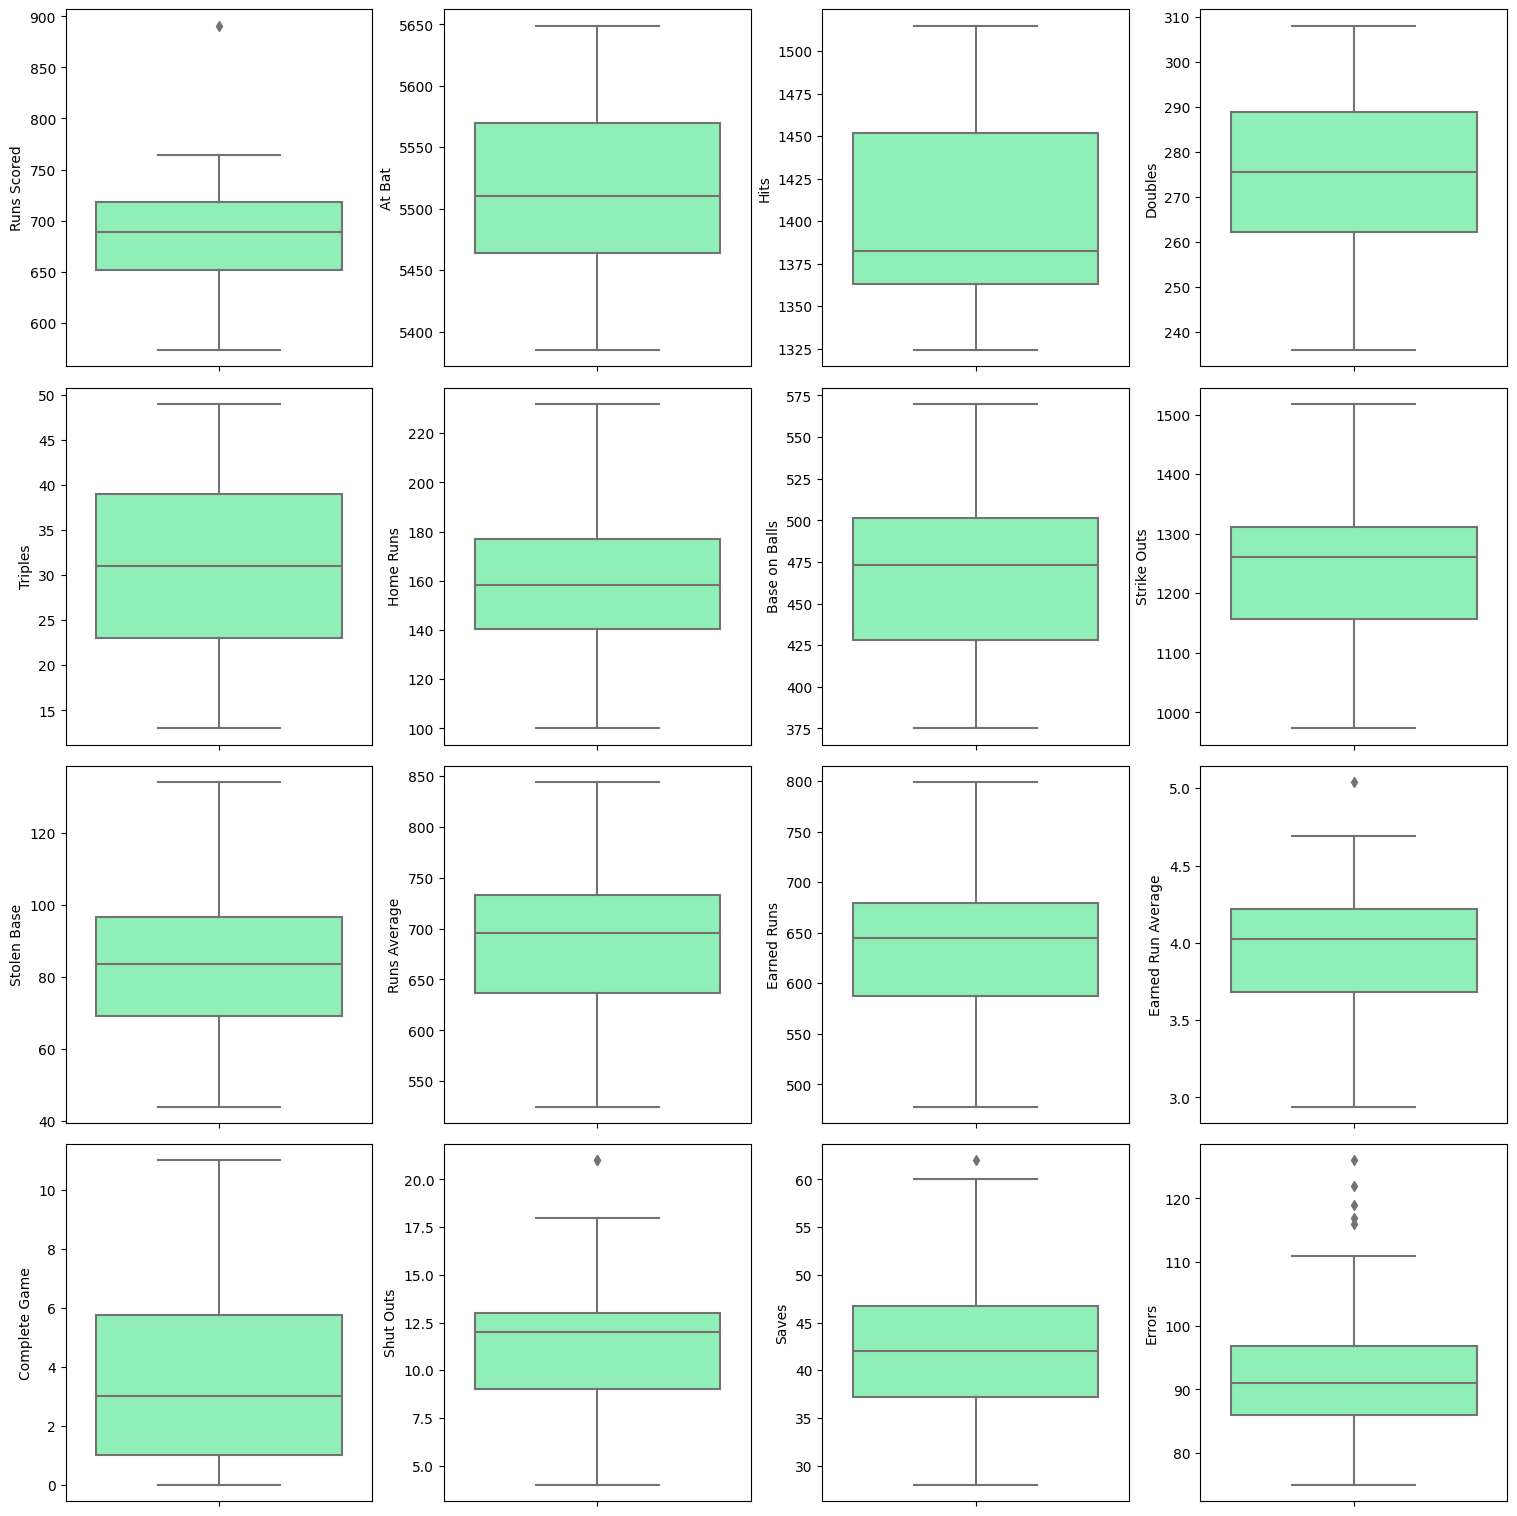

In [14]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="rainbow")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

- Runs Scored, Earned Run Average, Shut Outs, Saves and Error are the features with Outliers which need to be treated before model building

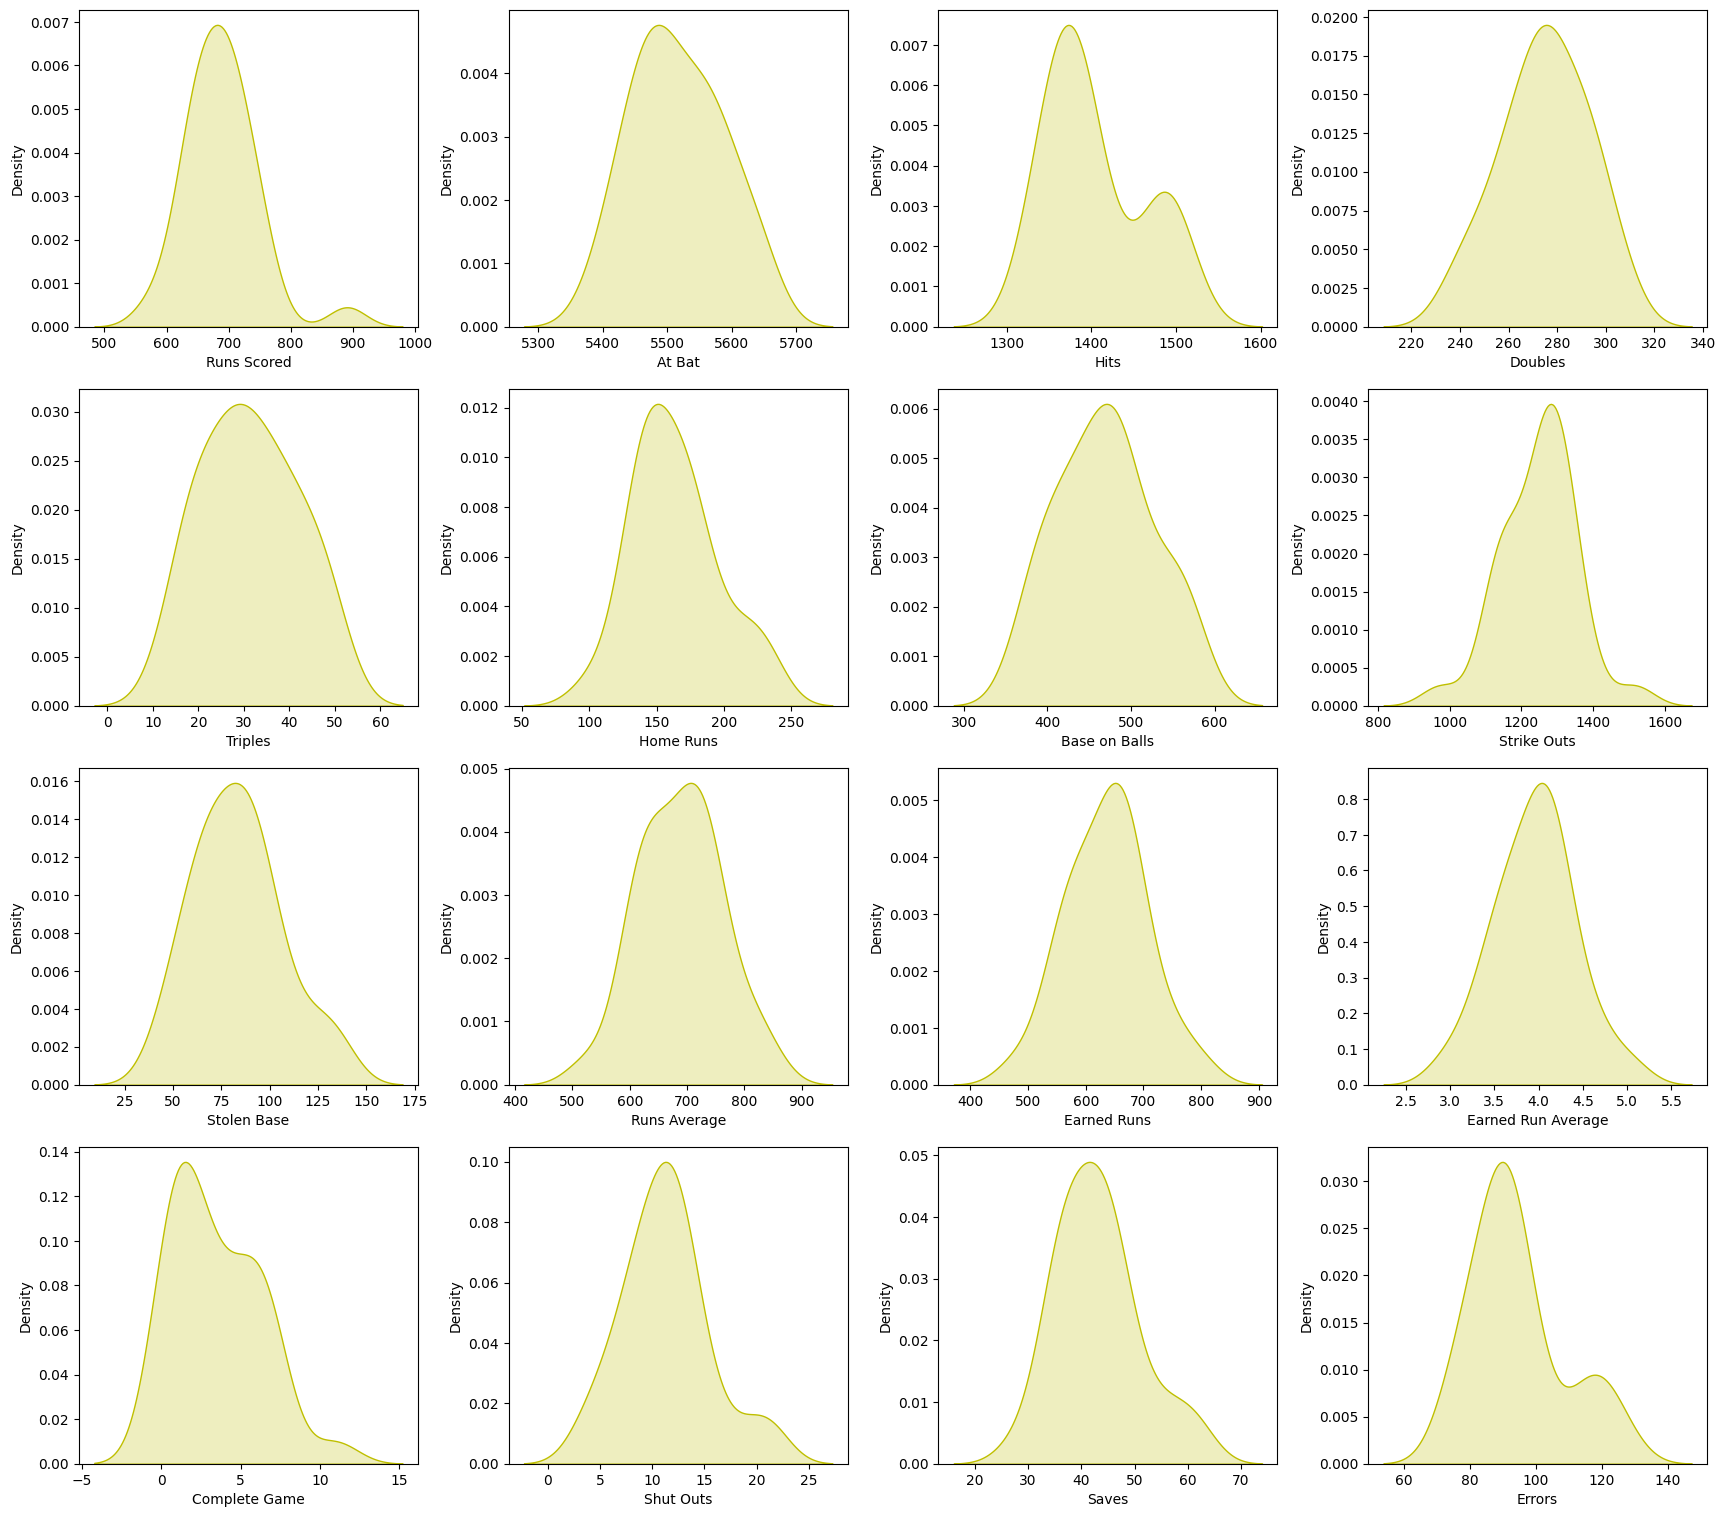

In [15]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(17,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.distplot(value, ax=ax[index], hist=False, color="y", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

- Except for Runs Scored, Complete Game, Shut Outs and Errors that have slight skewness in them other features are Normally Distributed

- The skewness of the Mentioned column will be treated properly before Model Building

- With this we are finished with the Univariate Analysis and we will proceed to the Bivaraite Analysis

### Bivariate Analysis

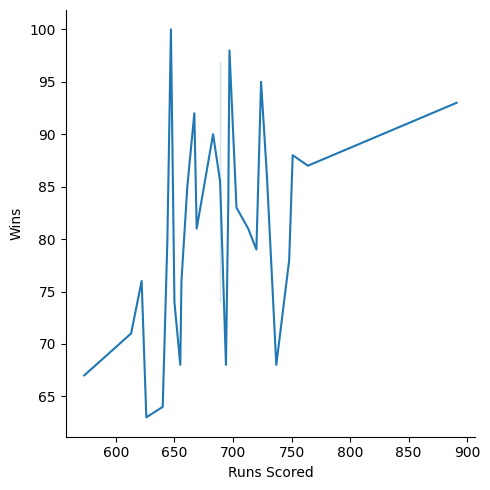

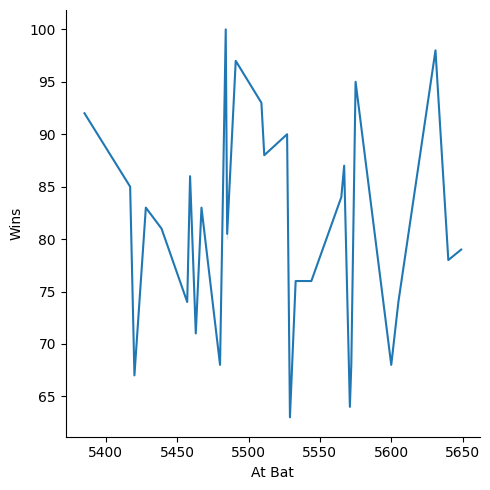

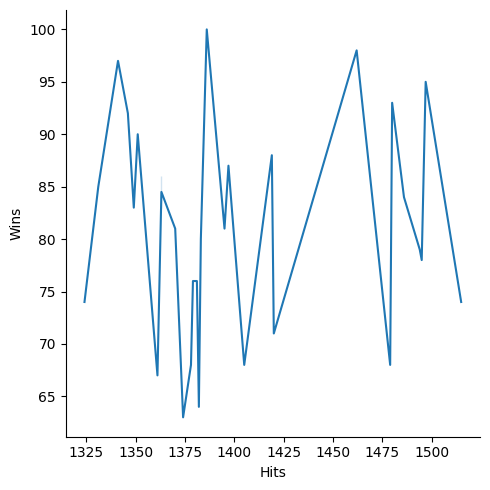

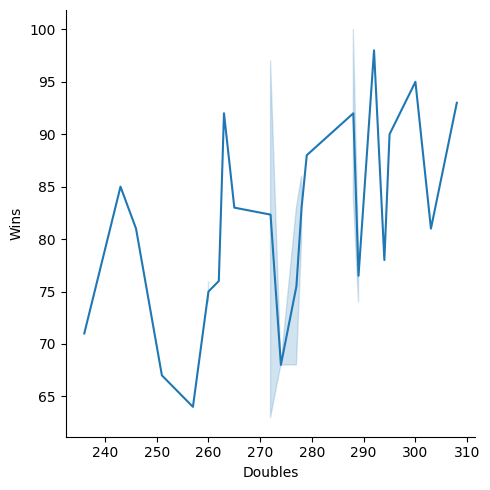

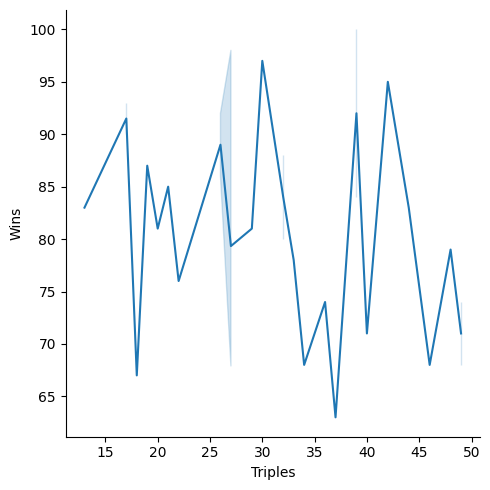

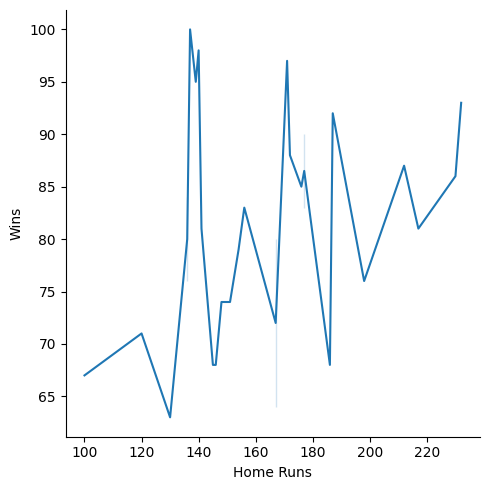

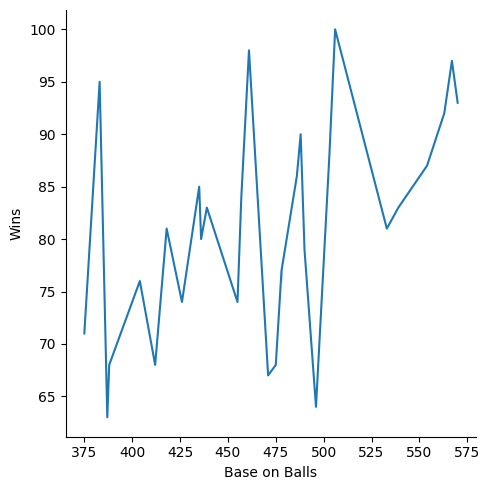

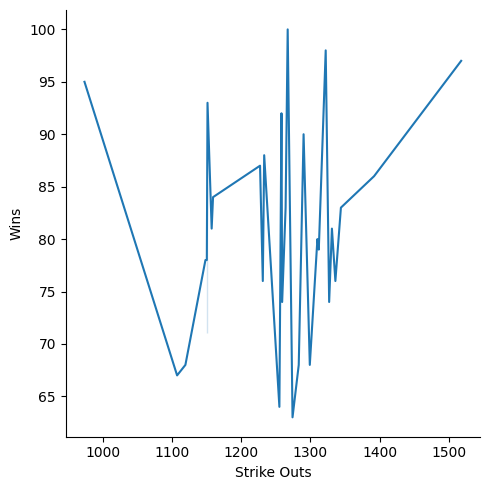

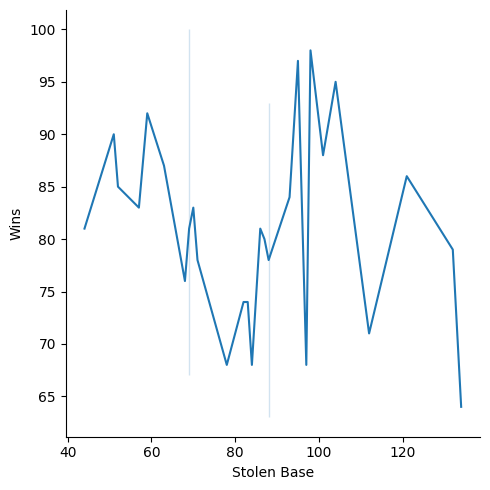

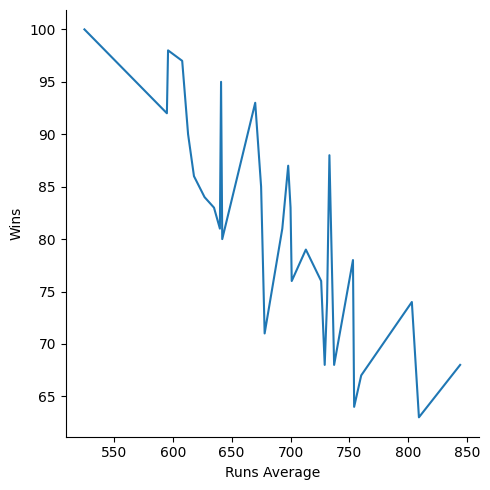

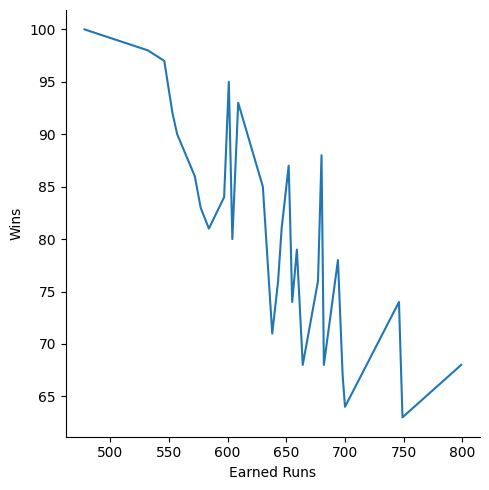

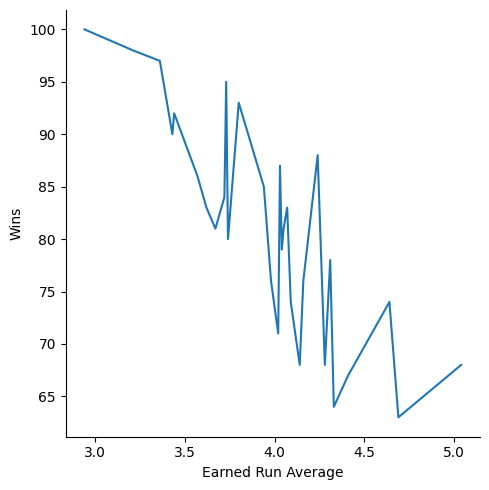

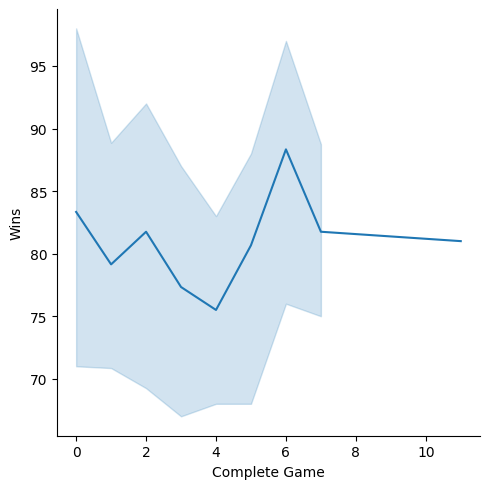

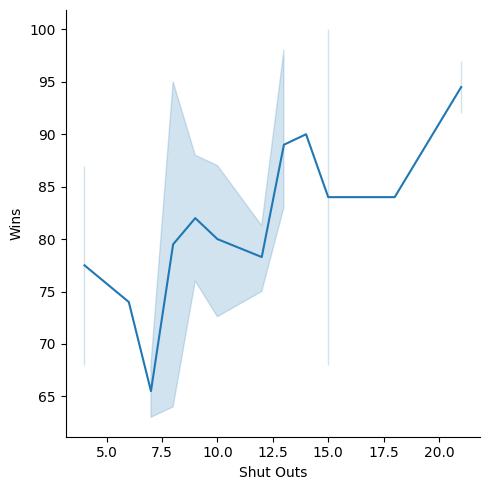

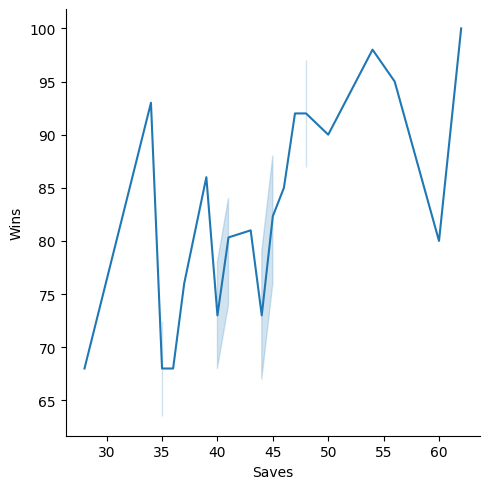

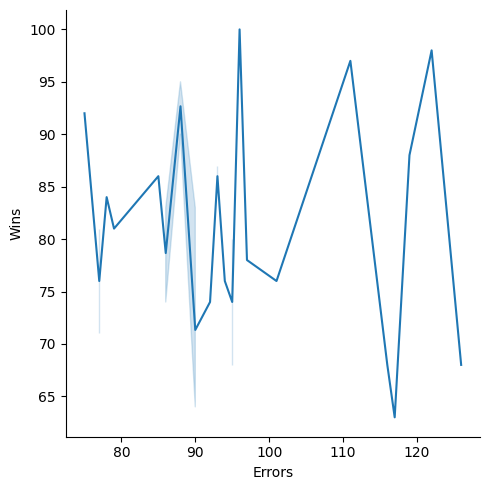

In [16]:
index = 0
features = df.drop("Wins", axis=1)
for col, value in features.items():
    sns.relplot(x=col, y="Wins", kind="line", data=df)
    index += 1
plt.show()

- The above Analysis Shows the Relation between the Indpendent features and the Target Variable

- There are many features which are Directly or indirectly proportional to the Target variable while some Don't affect the Target Variable

- In case the number of runs increases then the chance of win increases and except errors all the features are postively Correlated to the Target Variable

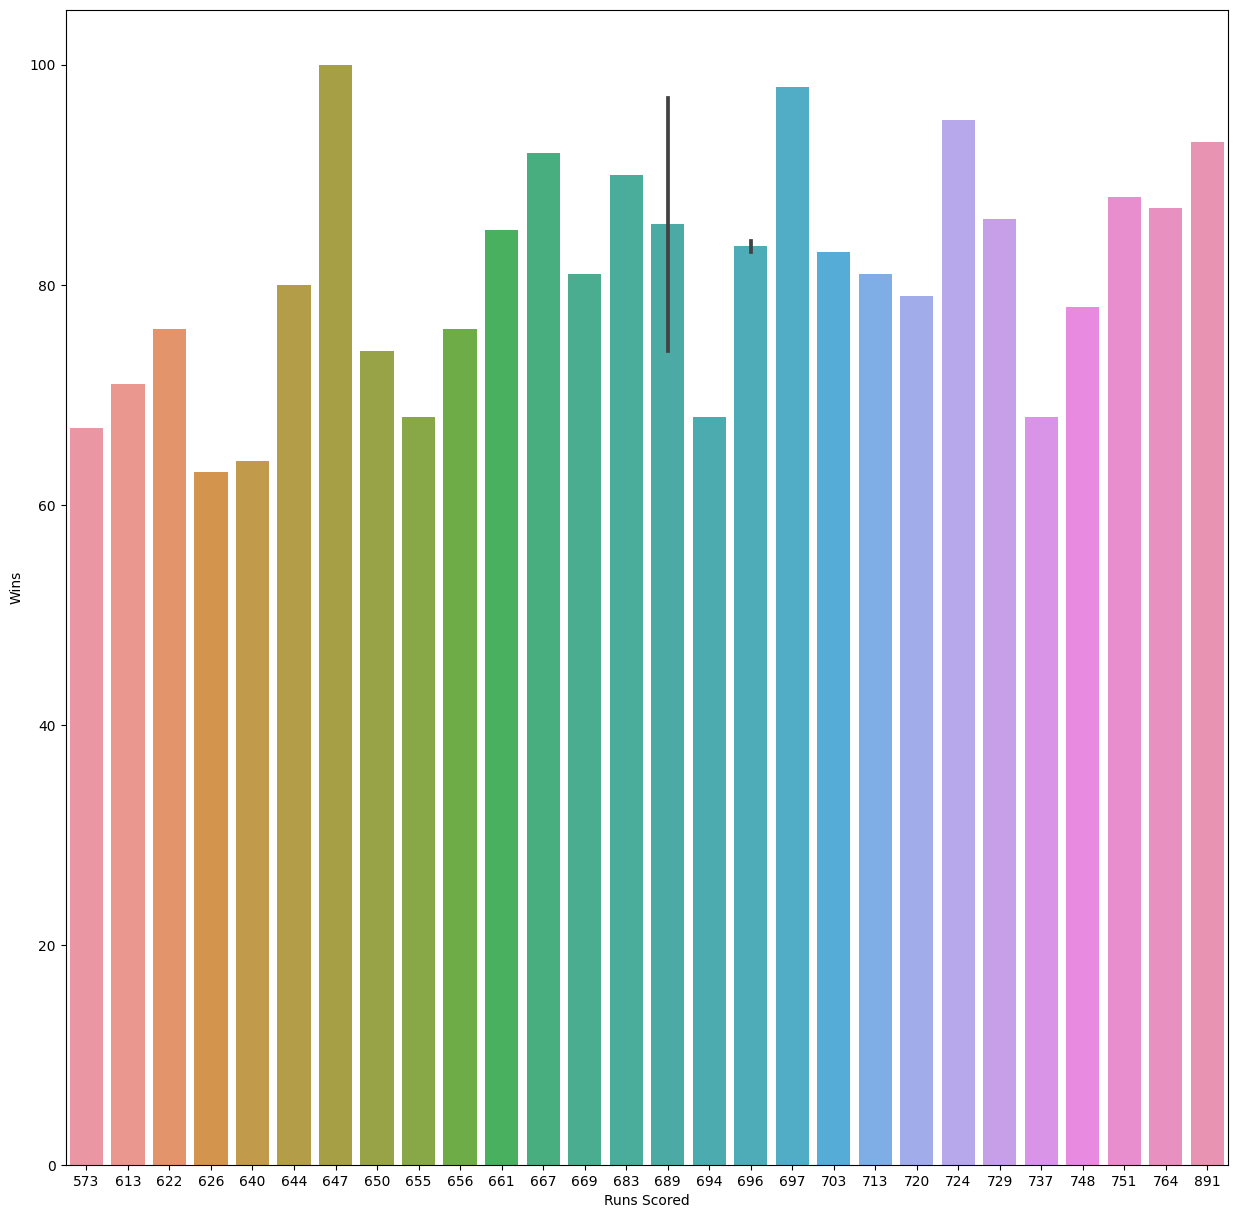

In [17]:
plt.figure(figsize=(15,15))
sns.barplot(x="Runs Scored", y="Wins", data=df)
plt.show()

- The Feature 'Runs Scored' is unevenly Distributed wrt 'Wins'

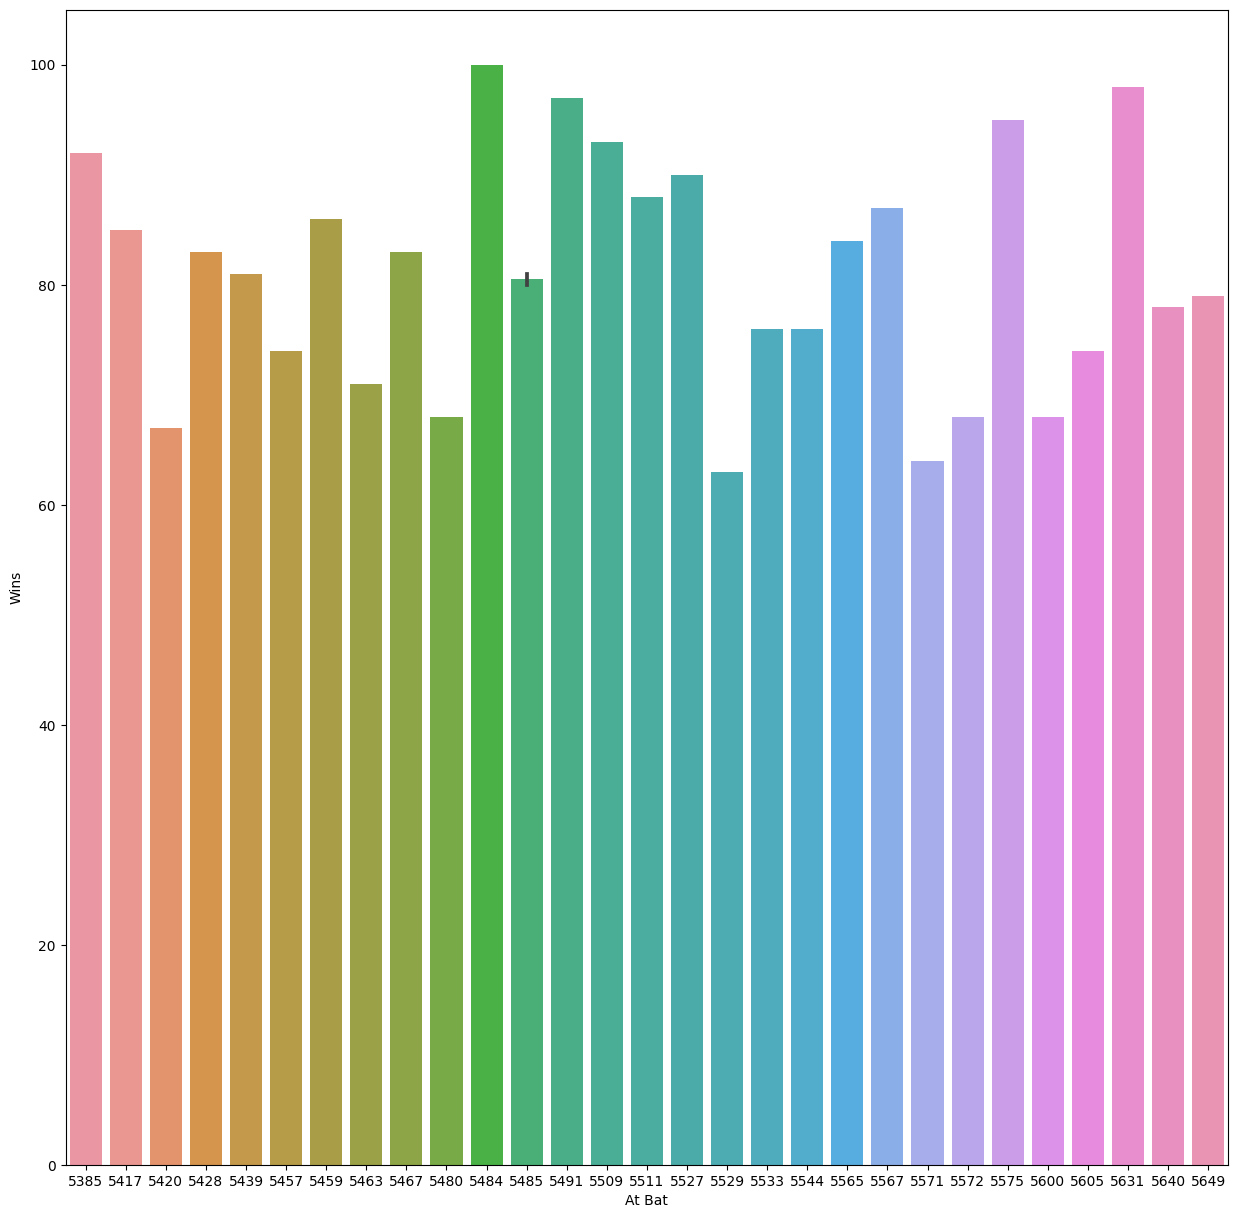

In [18]:
plt.figure(figsize=(15,15))
sns.barplot(x="At Bat", y="Wins", data=df)
plt.show()

- The above case is repeated as the Distrubtion is Uneven

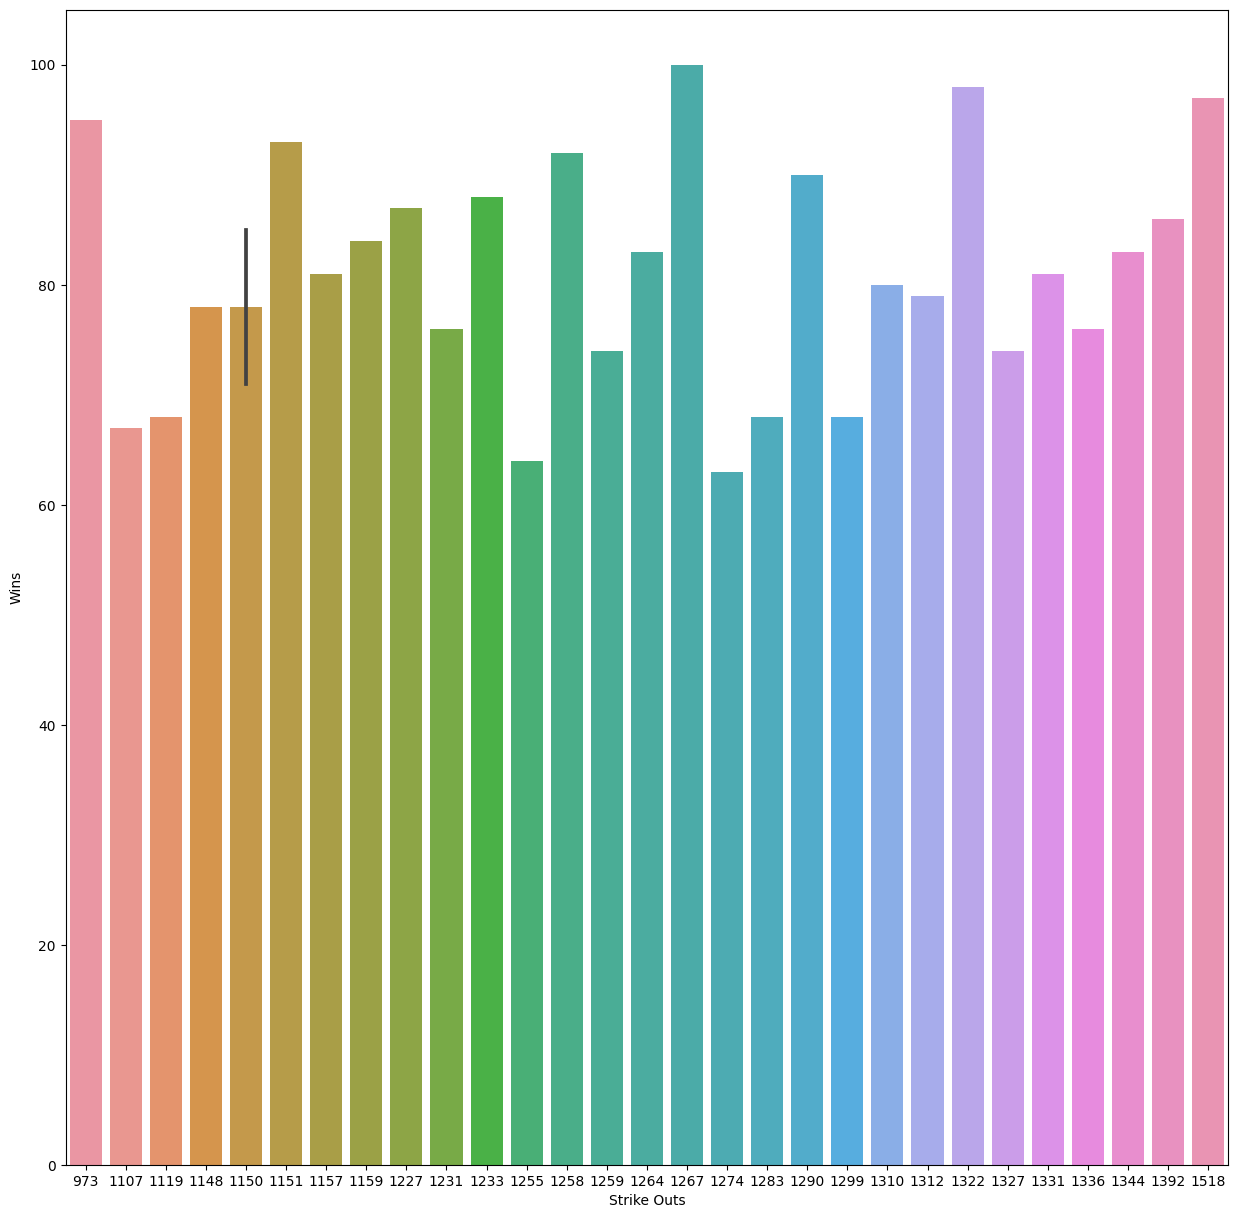

In [19]:
plt.figure(figsize=(15,15))
sns.barplot(x="Strike Outs", y="Wins", data=df)
plt.show()

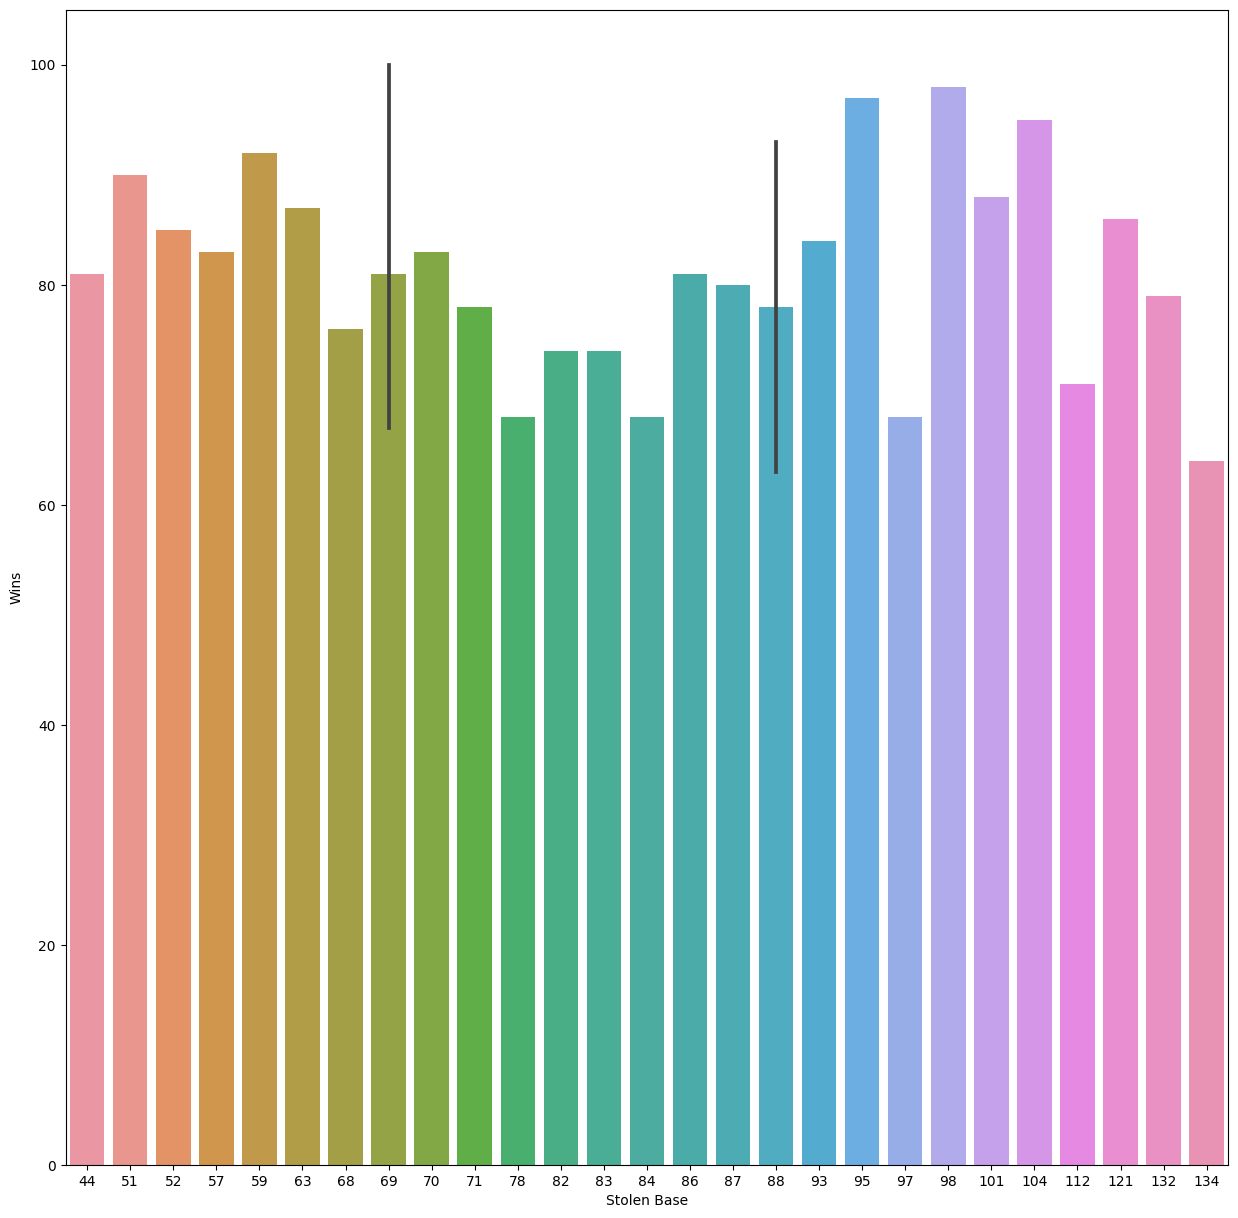

In [20]:
plt.figure(figsize=(15,15))
sns.barplot(x="Stolen Base", y="Wins", data=df)
plt.show()

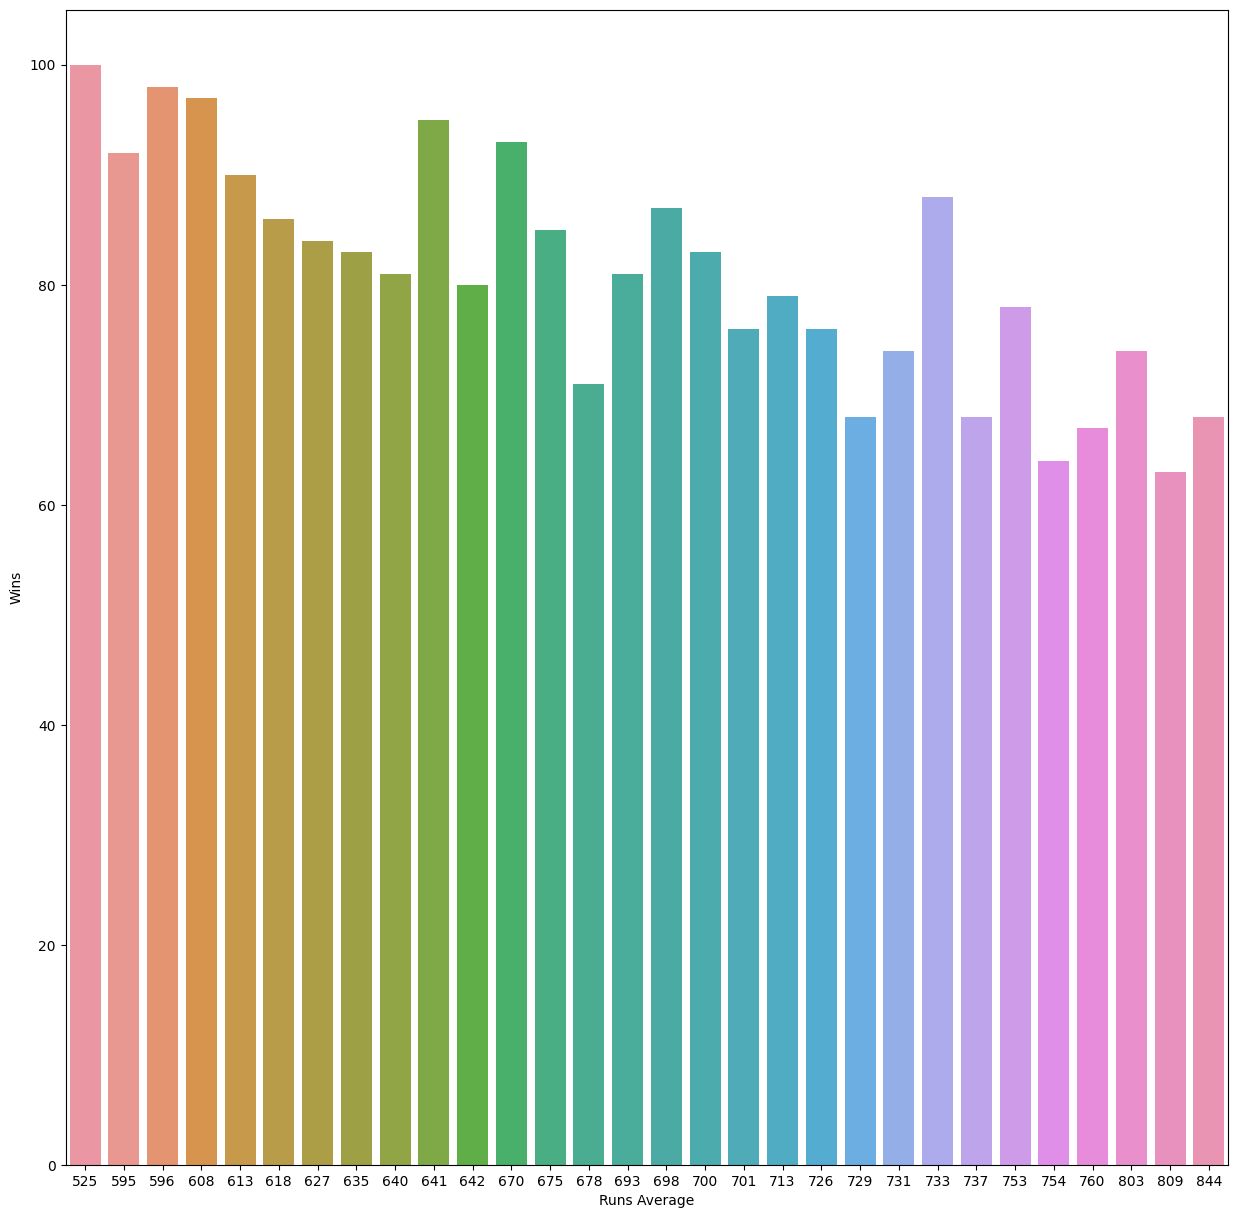

In [21]:
plt.figure(figsize=(15,15))
sns.barplot(x="Runs Average", y="Wins", data=df)
plt.show()

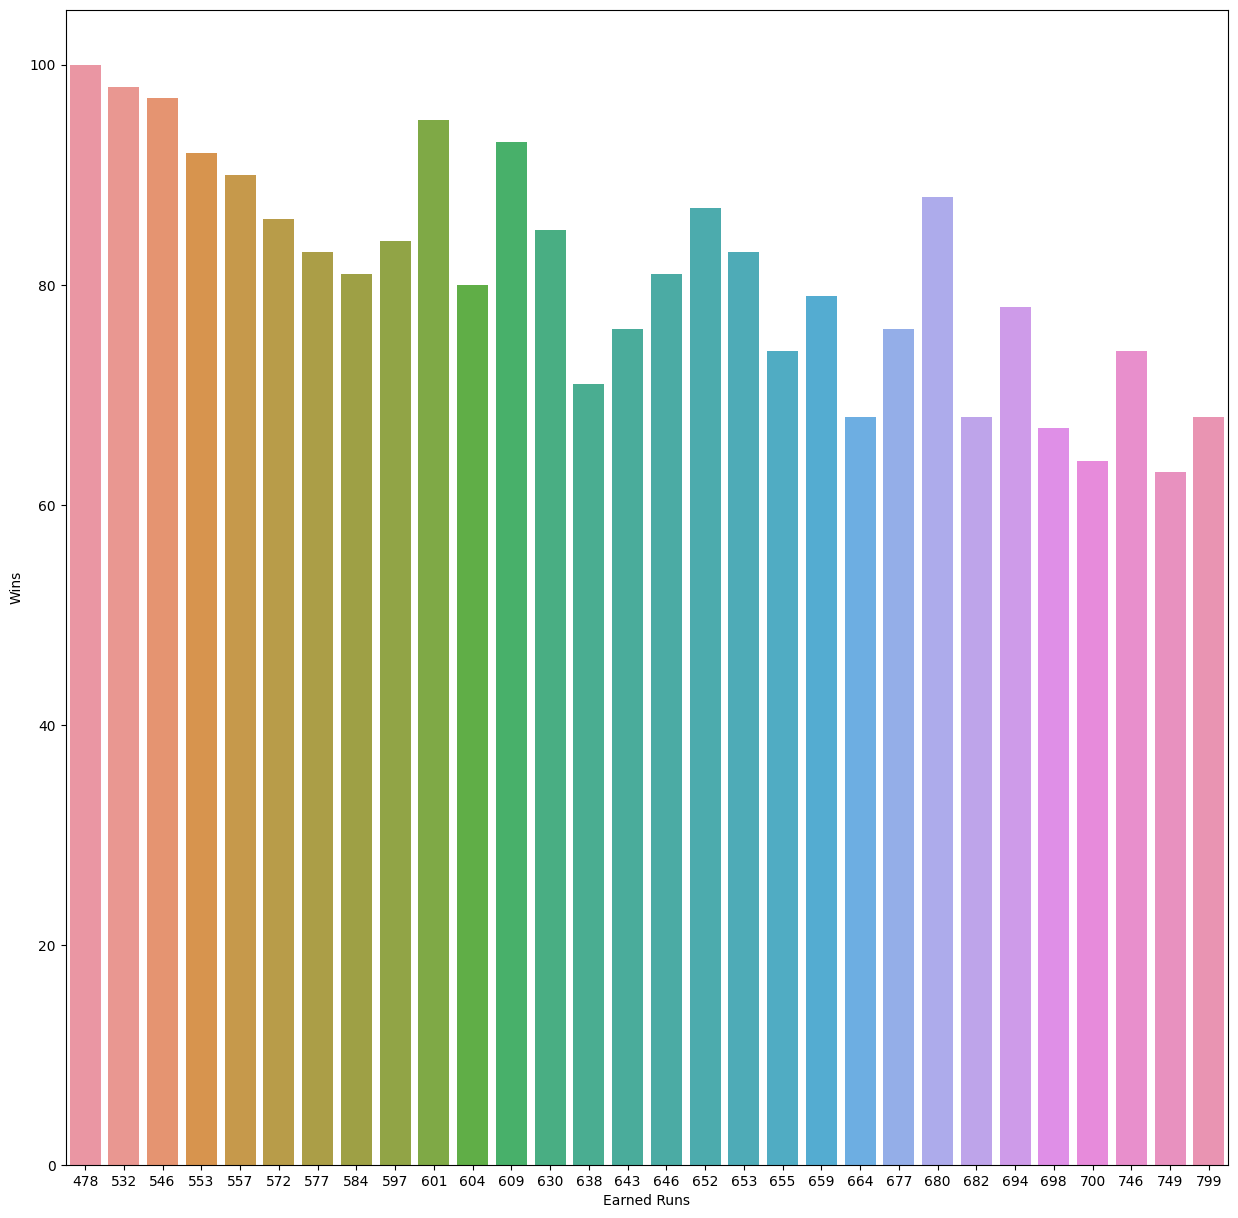

In [22]:
plt.figure(figsize=(15,15))
sns.barplot(x="Earned Runs", y="Wins", data=df)
plt.show()

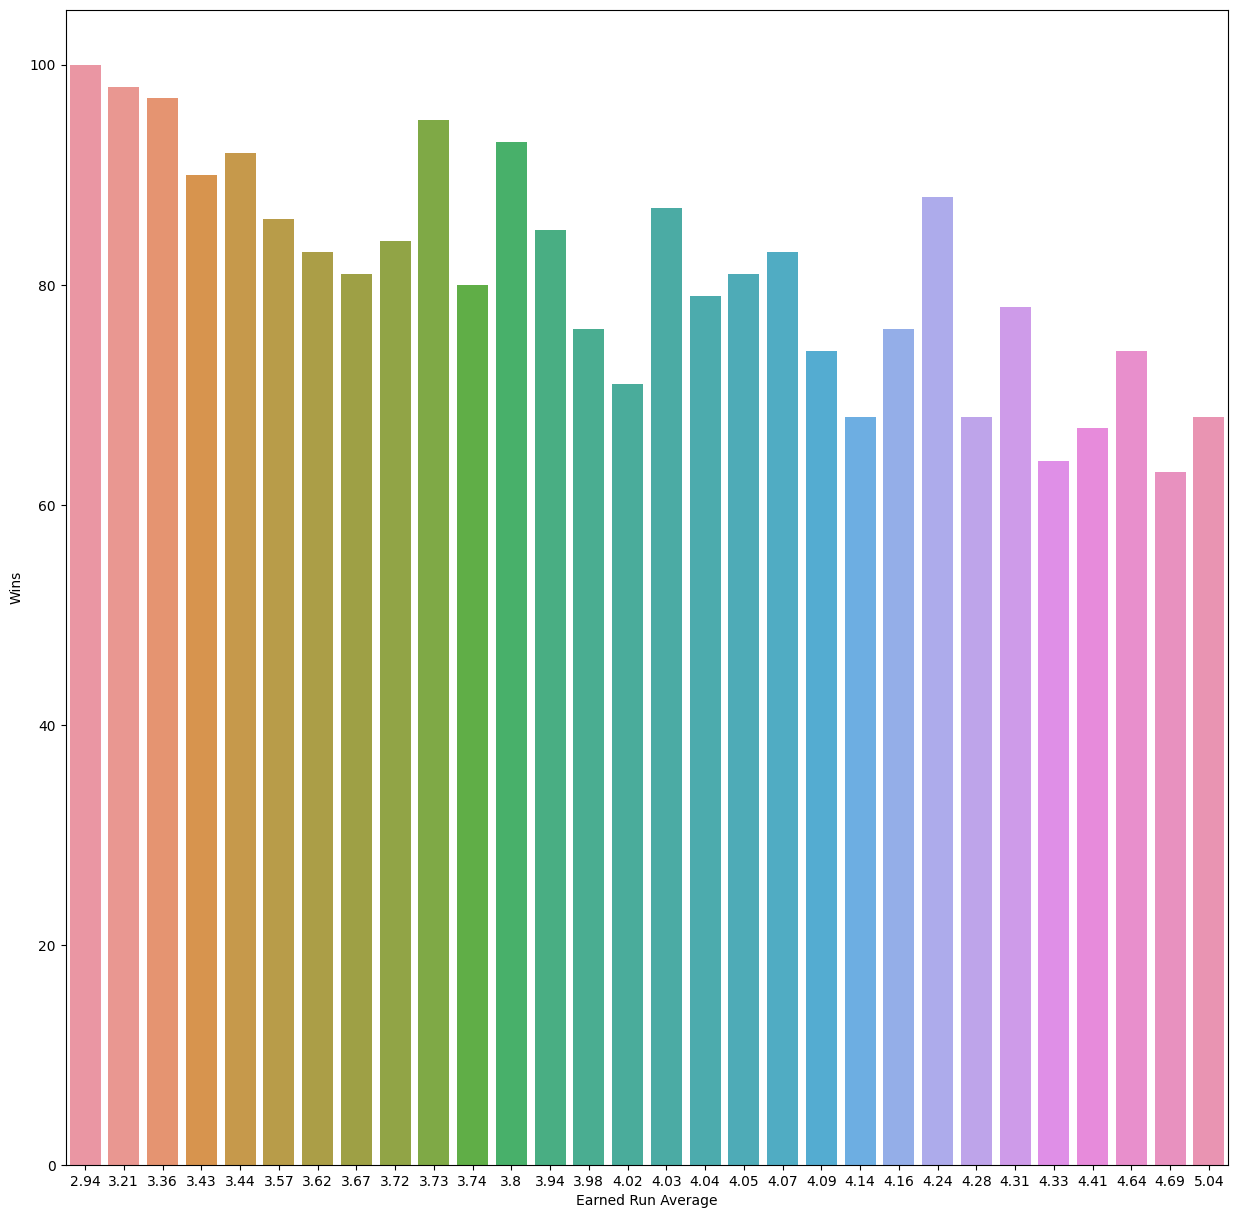

In [23]:
plt.figure(figsize=(15,15))
sns.barplot(x="Earned Run Average", y="Wins", data=df)
plt.show()

- The Features 'Runs Average', 'Earned Runs', 'Earned Runs Average' are Distributed unevenly in Decreasing order

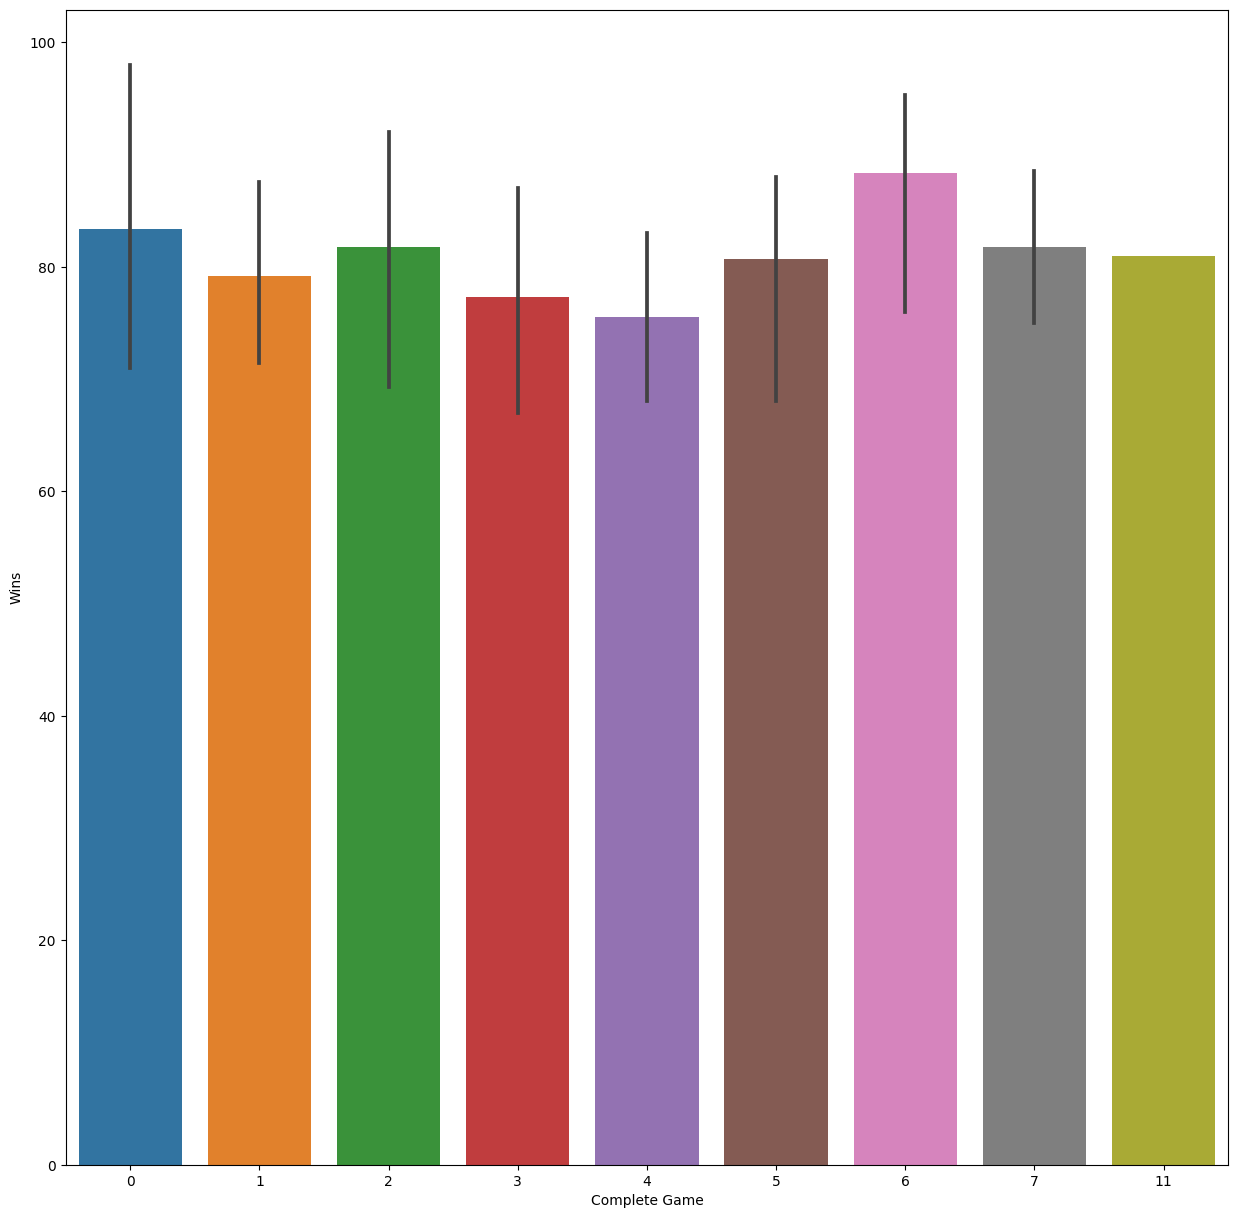

In [24]:
plt.figure(figsize=(15,15))
sns.barplot(x="Complete Game", y="Wins", data=df)
plt.show()

- "Complete Game" and it's unique values do not show any pattern when it comes to relating with our feature "Wins"

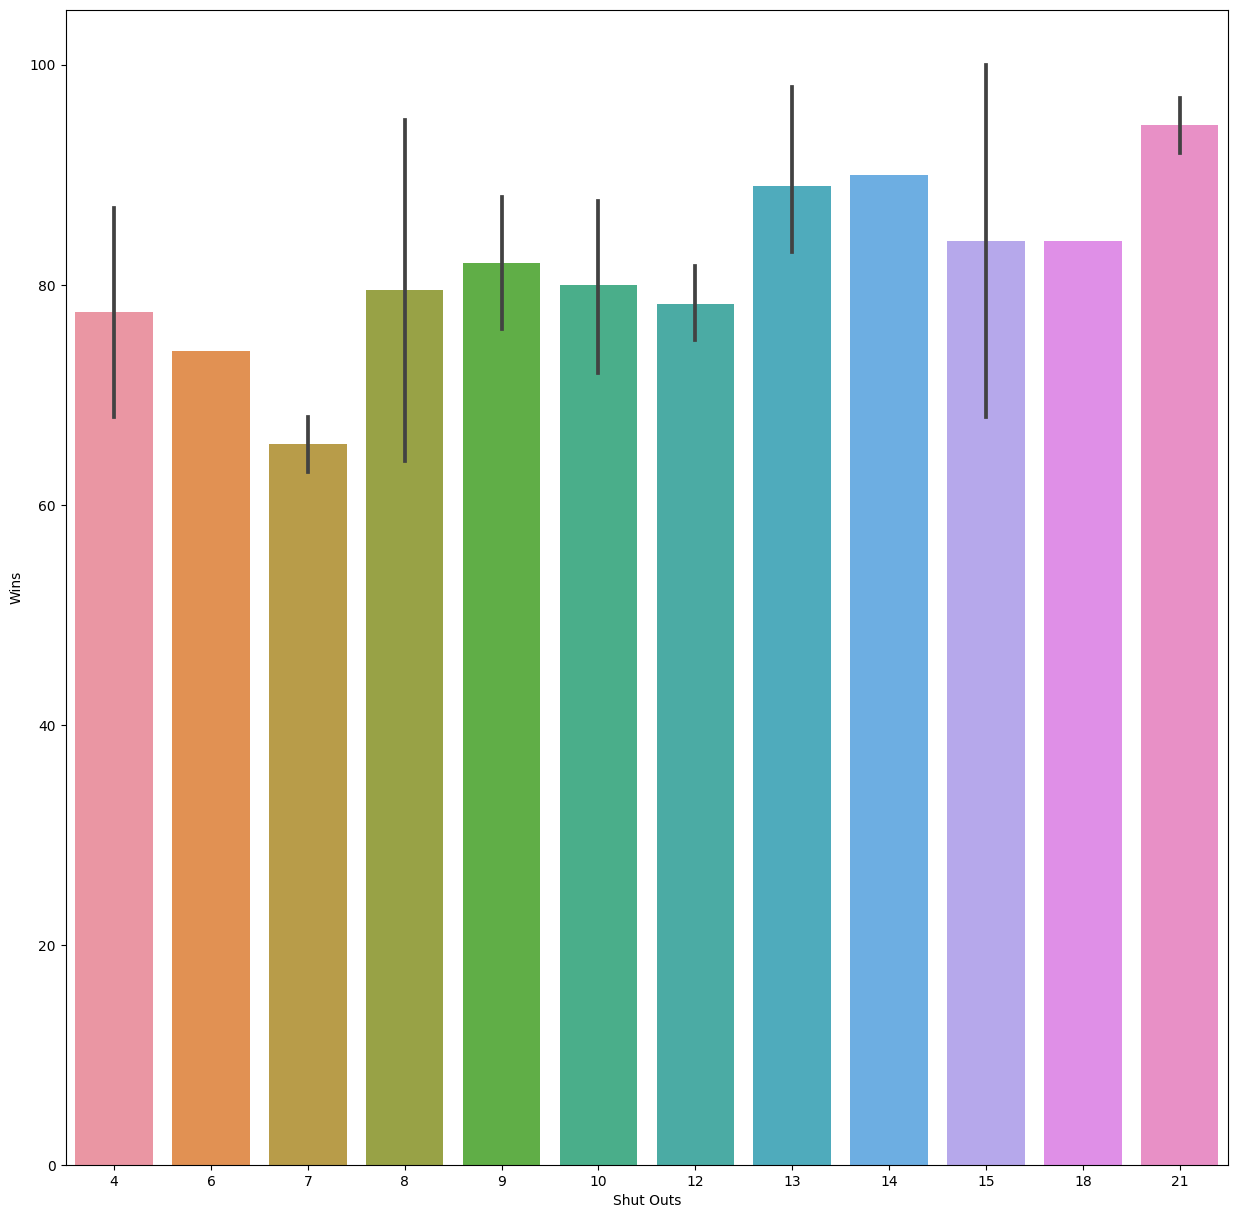

In [25]:
plt.figure(figsize=(15,15))
sns.barplot(x="Shut Outs", y="Wins", data=df)
plt.show()

- "Shut Outs" and it's unique values are also distributed unevenly when it comes to relating with Feature "Wins"

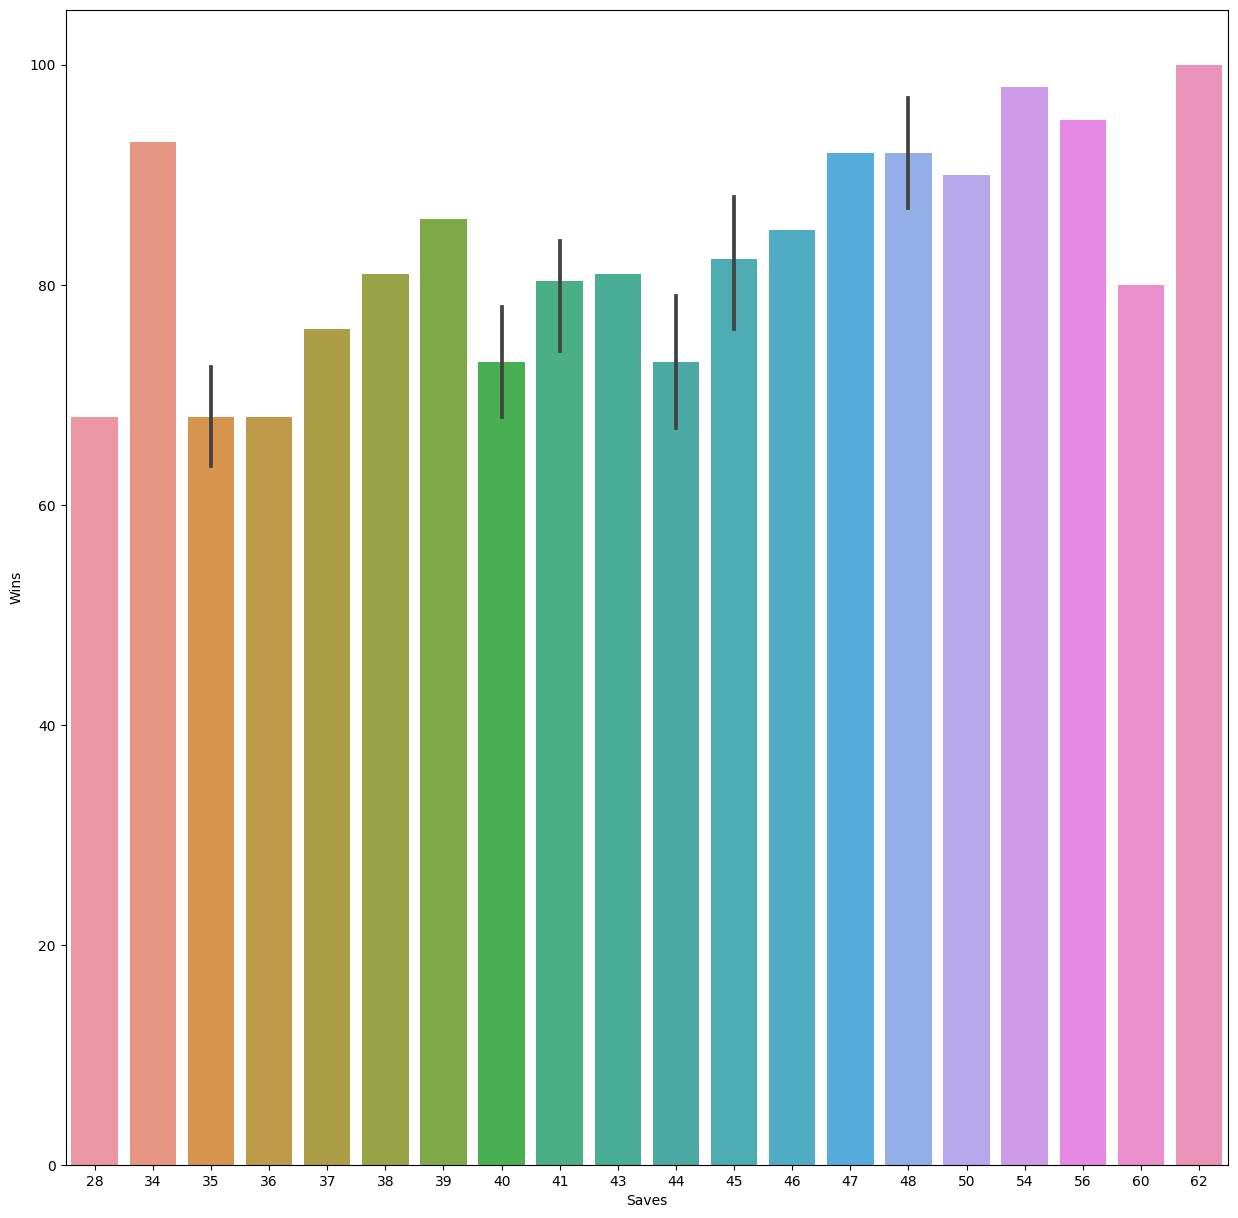

In [26]:
plt.figure(figsize=(15,15))
sns.barplot(x="Saves", y="Wins", data=df)
plt.show()

- "Saves" and it's unique values show a slightly increasig pattern when it comes to relating with feature "Wins"

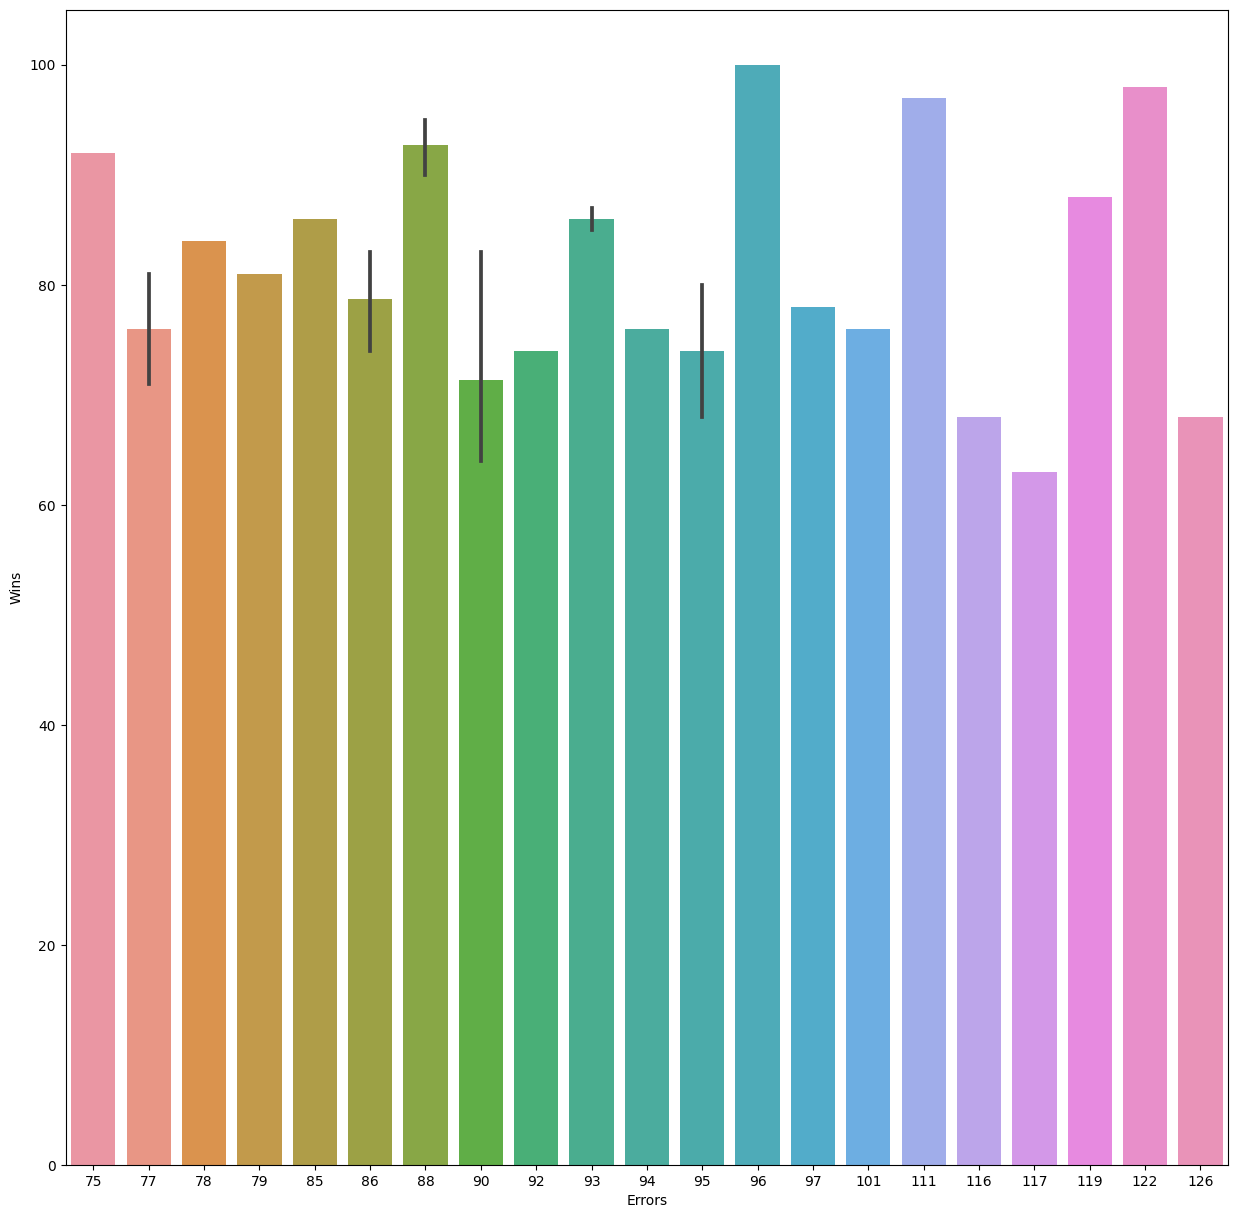

In [27]:
plt.figure(figsize=(15,15))
sns.barplot(x="Errors", y="Wins", data=df)
plt.show()

- "Errors" and it's unique values are again distributed unevenly when it comes to relating with feature "Wins"

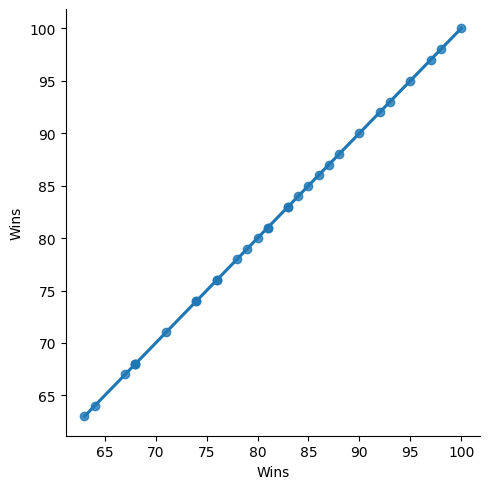

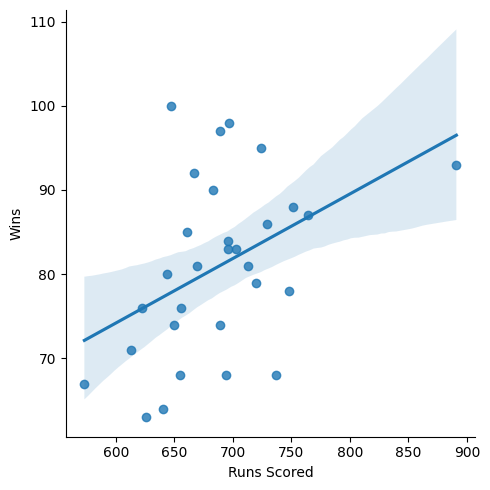

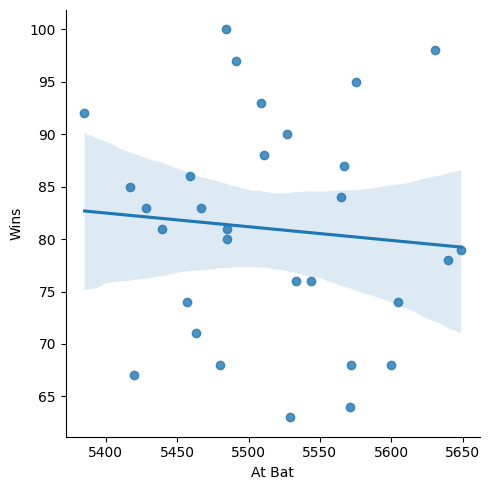

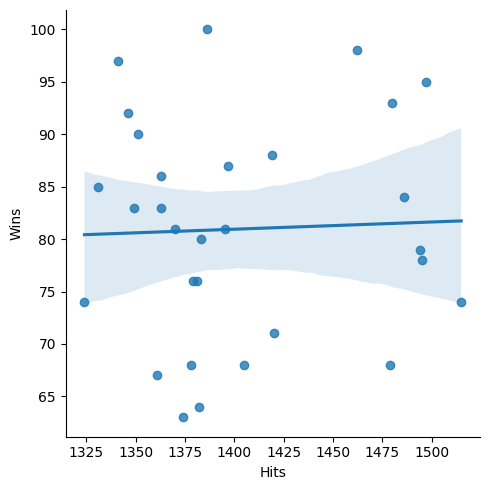

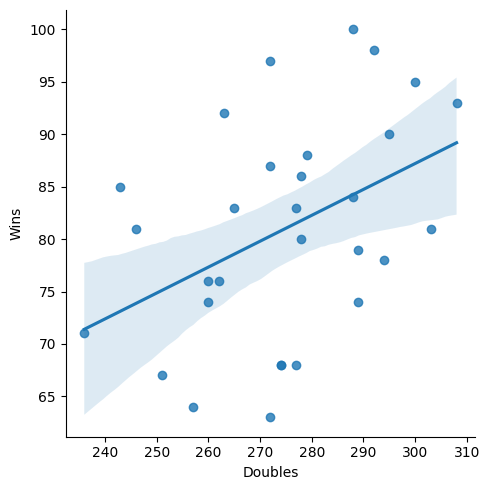

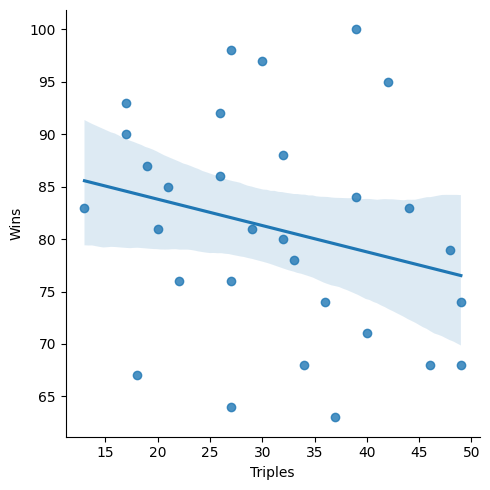

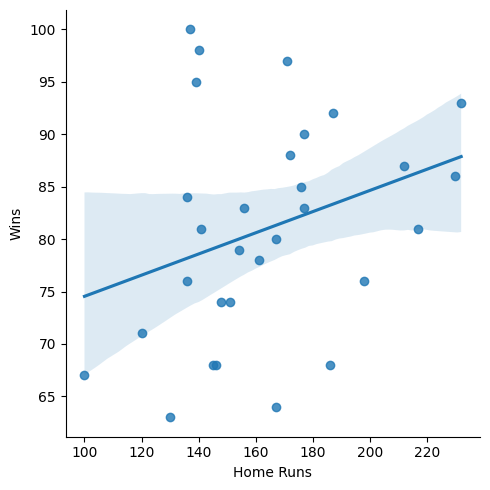

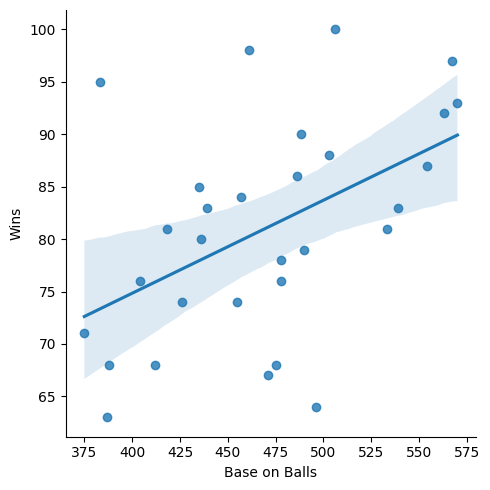

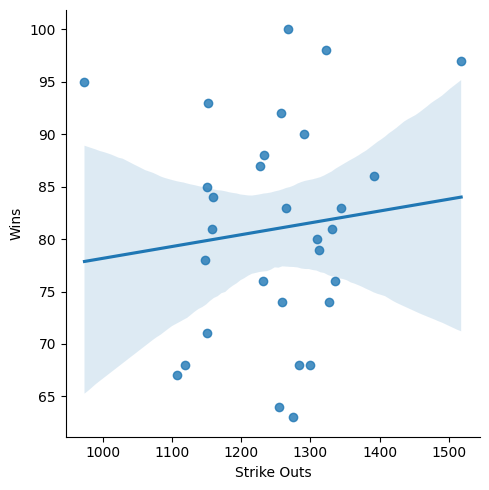

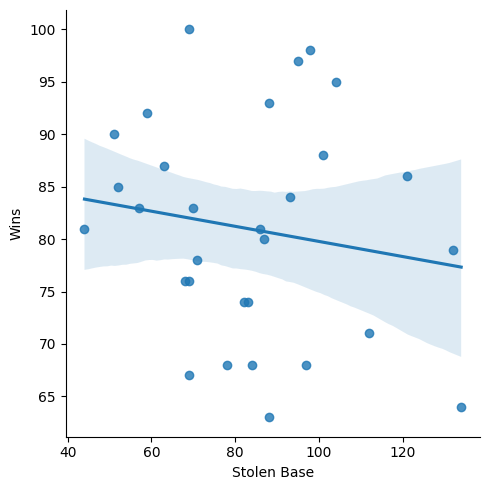

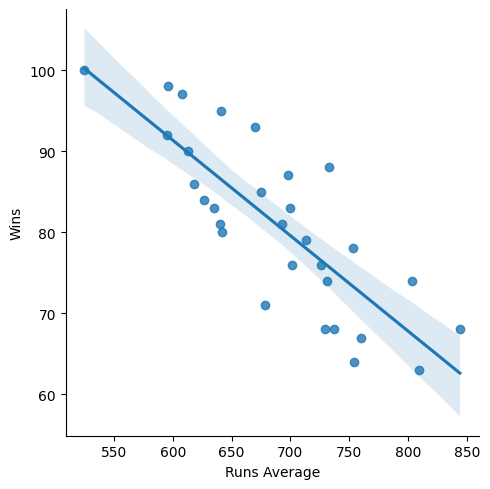

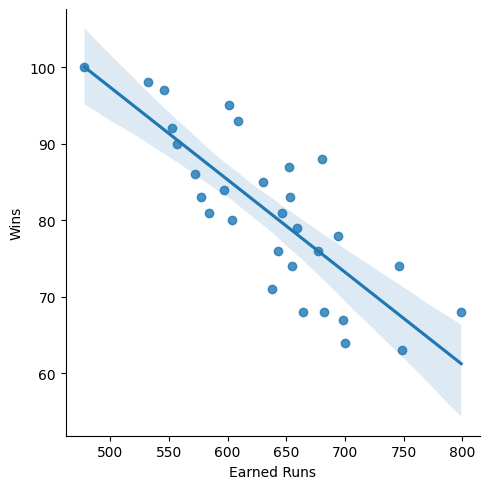

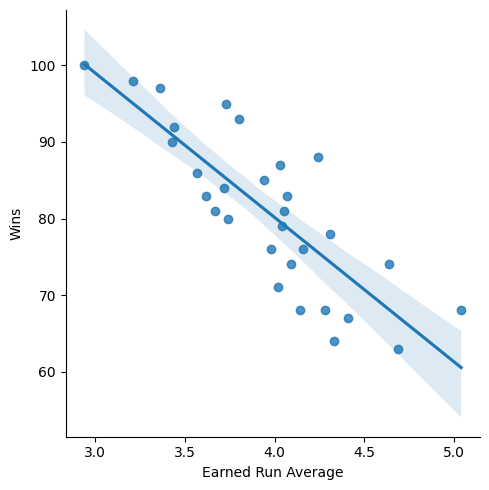

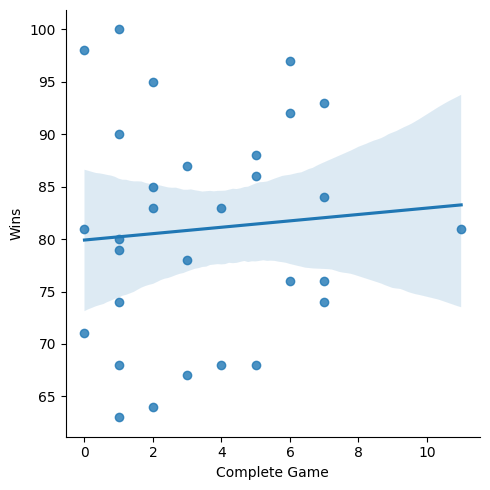

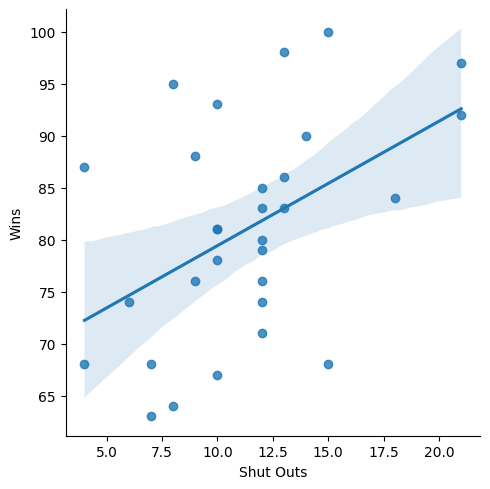

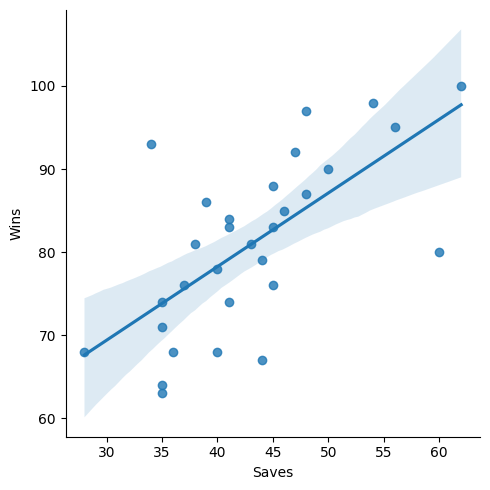

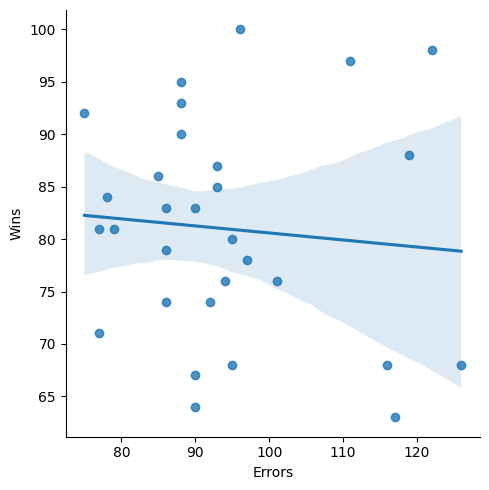

In [28]:
for i in df:
    sns.lmplot(x = i , y ='Wins' , data = df)

### Multivariate Analysis

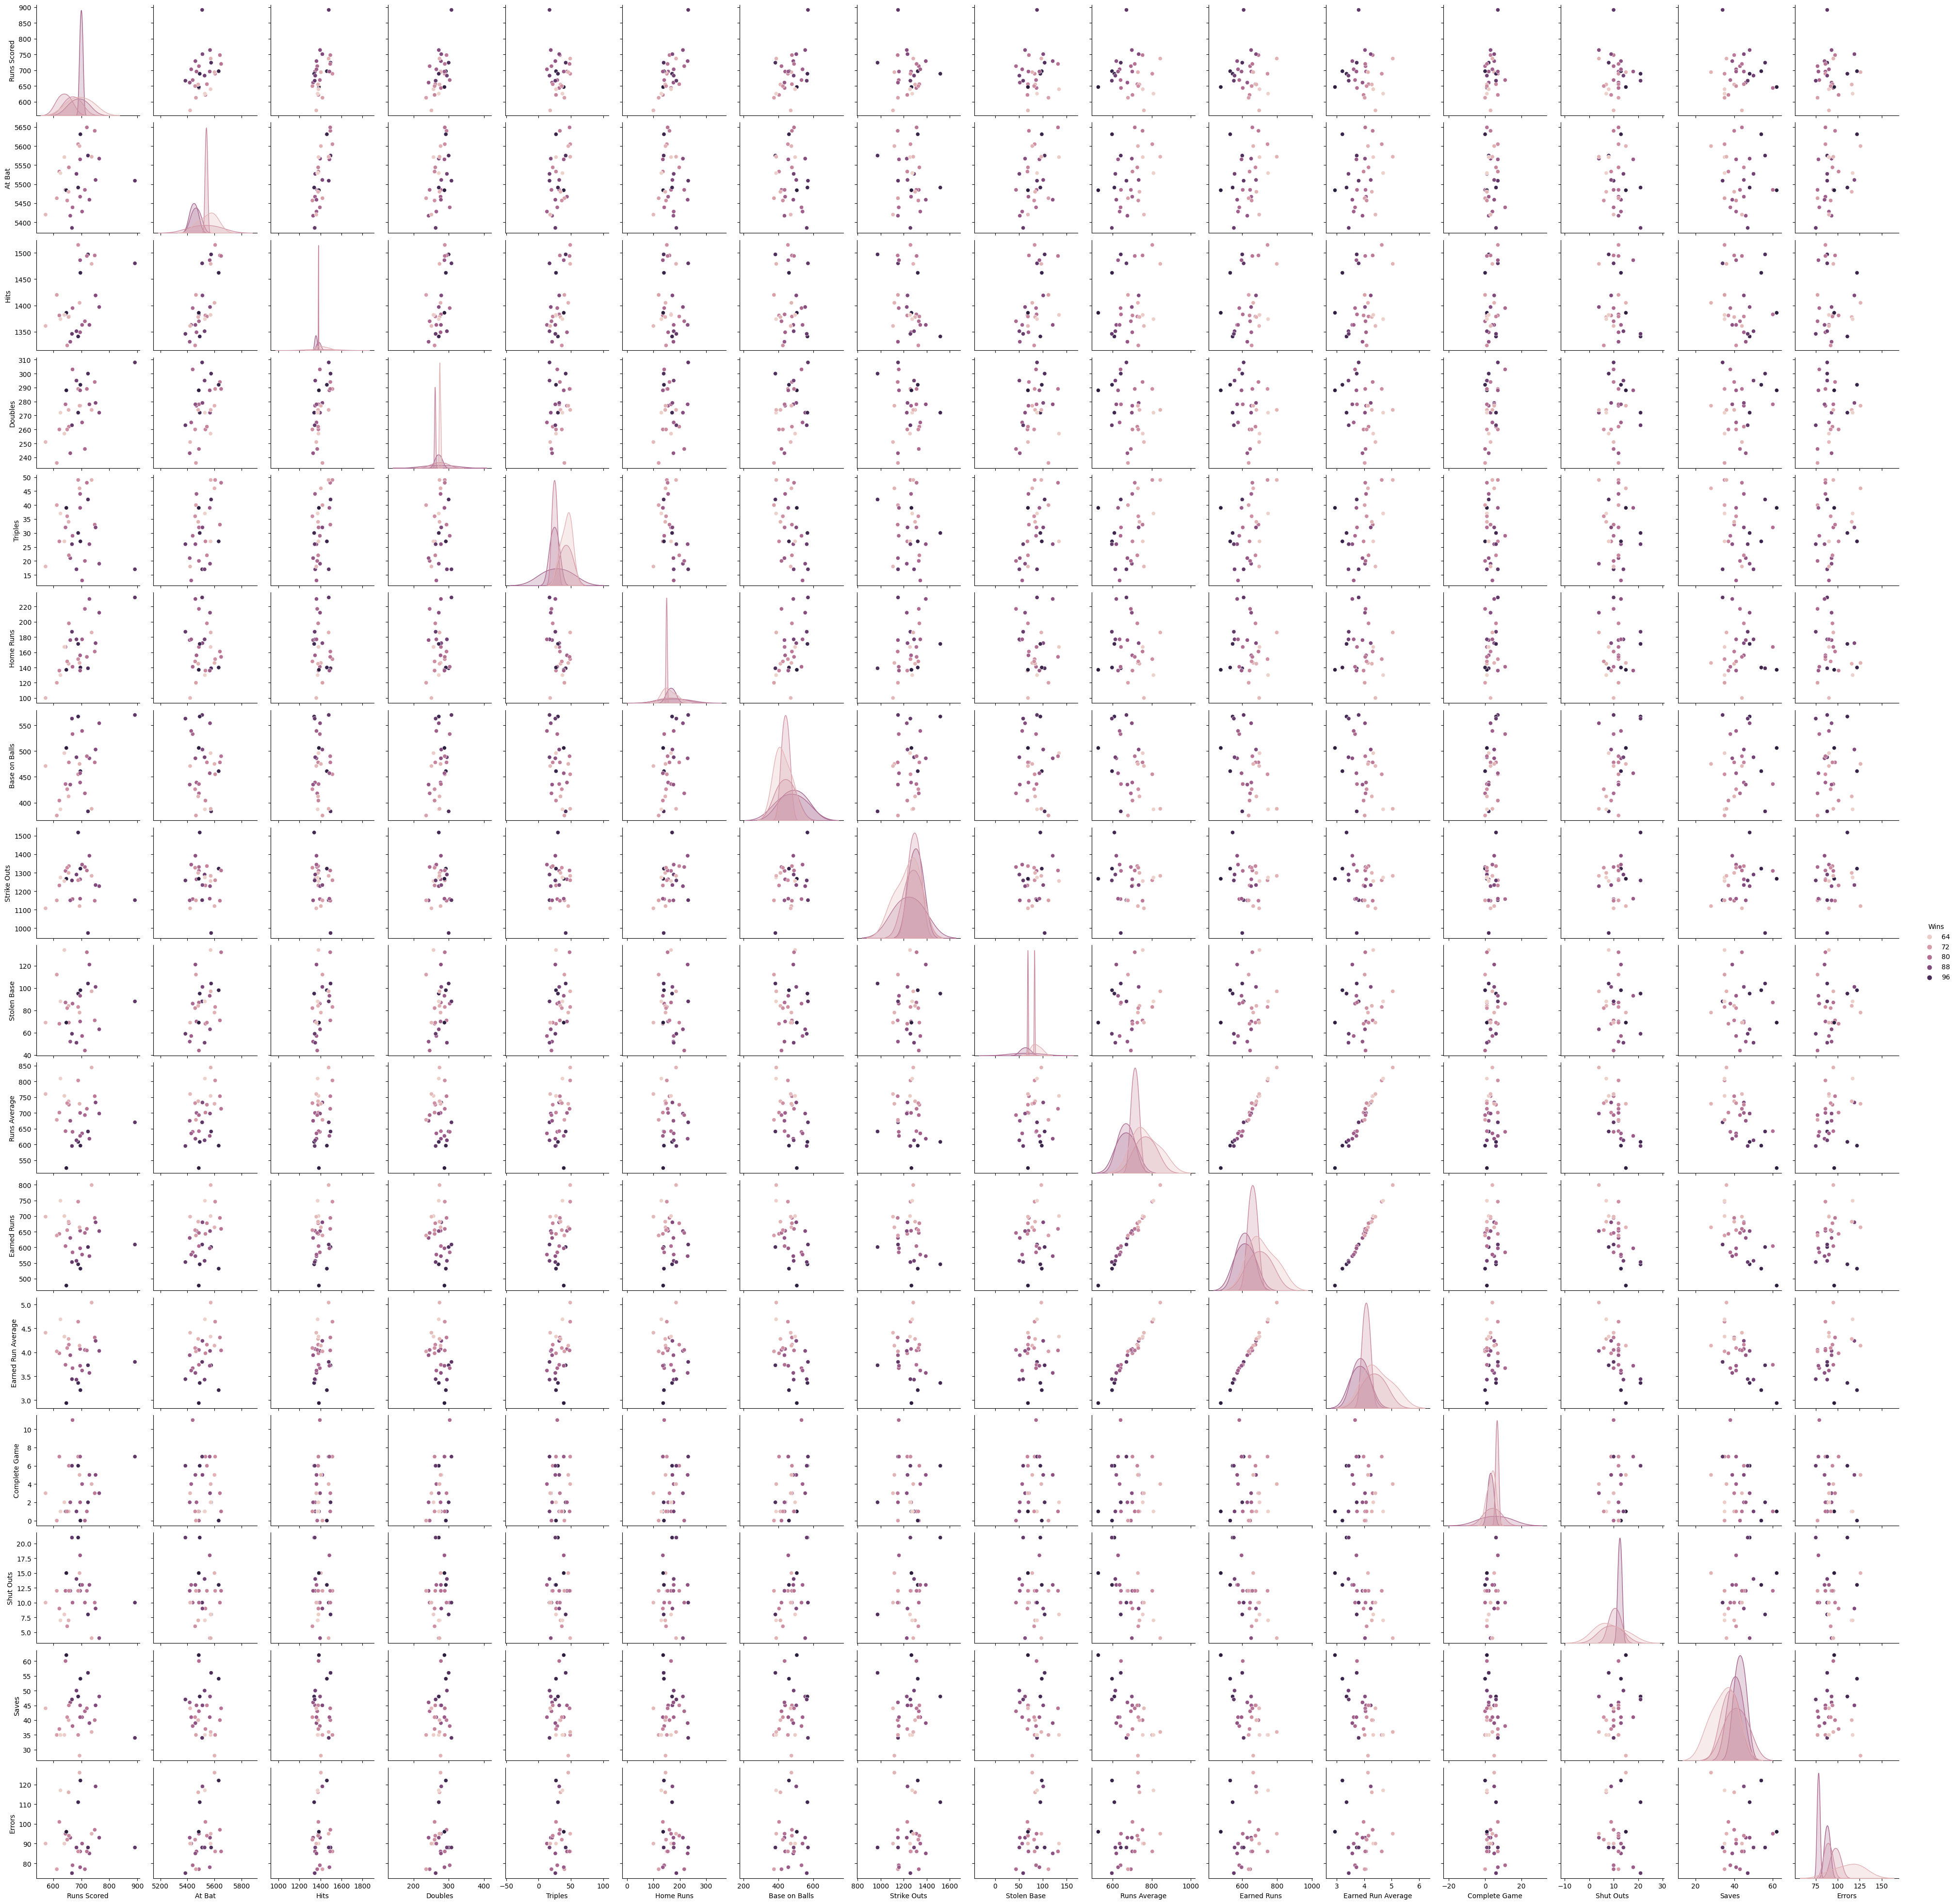

In [29]:
sns.pairplot(df, hue="Wins")

- The presence of 17 features in the Dataset has made it Difficult to get observation from the Pairplot
- We will proceed with the Heatmap to understand the correlation between the features more accurately

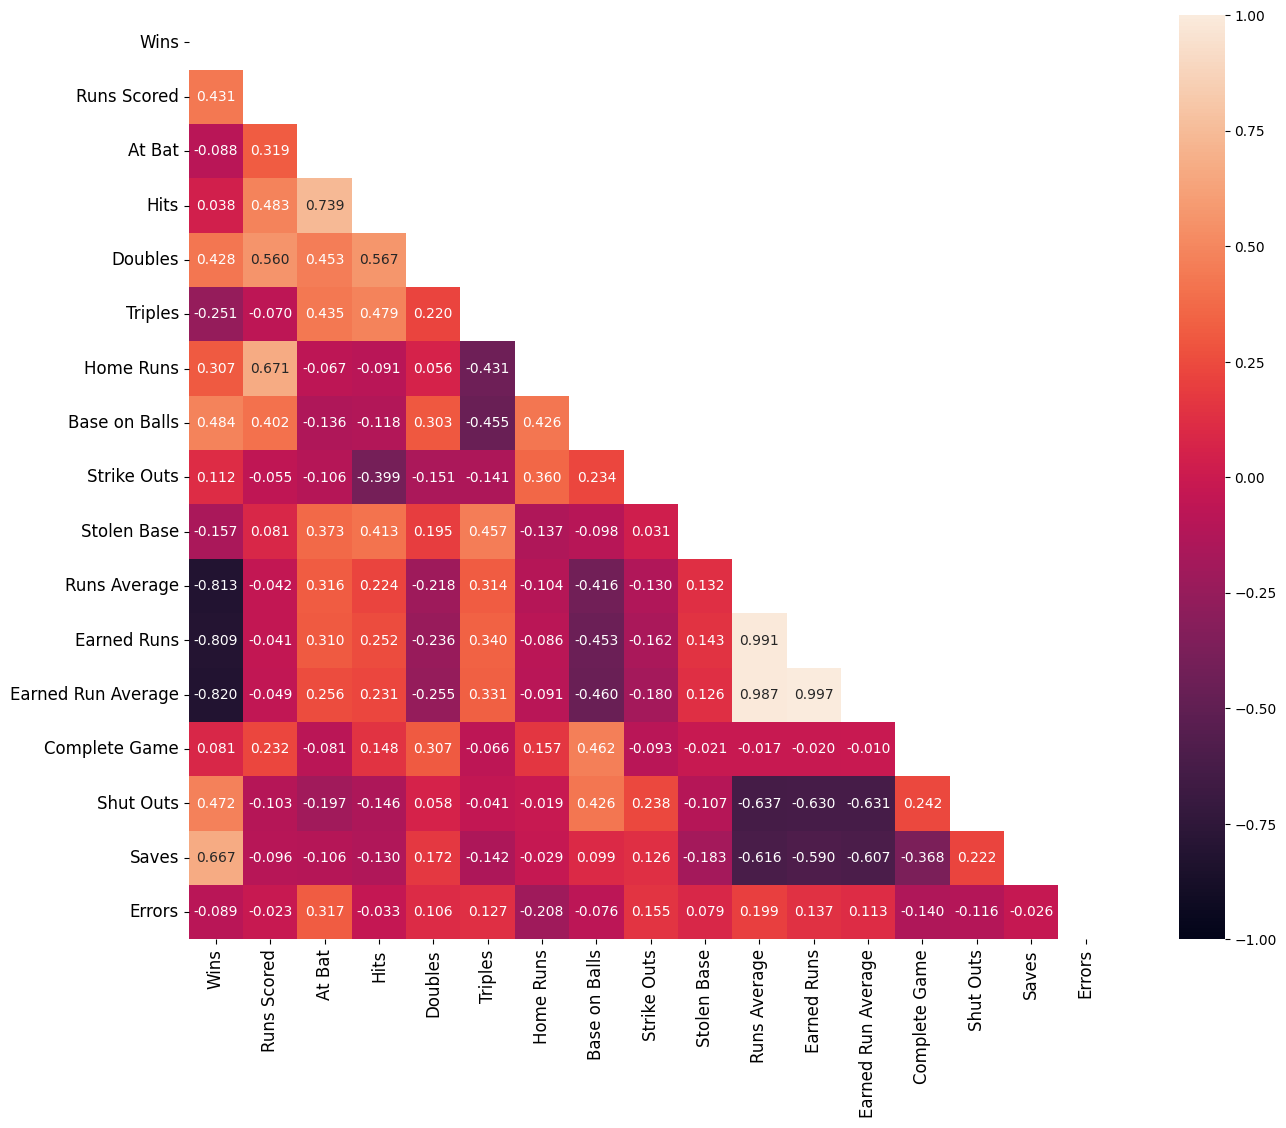

In [30]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Observation:
- The  columns "Runs Average", "Earned Runs" and "Earned Run Average" are showing negative correlation with the Dependent feature 'Wins'
- There is multi colinearity between the features "Earned Runs", "Earned Run Average" and "Runs Average".
- We can drop highly correlated features or we can make use of PCA to reduce Multi-collinearity before the model building

- Since the features "Earned Runs" and "Earned Run Average" have a high collinearity with the column "Runs Average" we will drop these two featues to avoid multi collinearity in the model.

In [31]:
## Dropping the two features
df = df.drop(["Earned Runs", "Earned Run Average"], axis=1)

### Outlier Removal

- We will use the Z-score Technique to remove the Outliers

In [34]:
from scipy.stats import zscore
## Lets assume the Threshold to be where data points which have higher Z-score than 3 will be treated as Outliers
threshold = 3
z = np.abs(zscore(df))
df_new = df[(z<3).all(axis = 1)]

## Calculating the Paramters to get the idea about the Data Loss
print ("Dataframe shape before removing outliers: ", df.shape)
print ("Dataframe shape after removing outliers: ", df_new.shape)
print ("Percentage of data loss after outlier removal: ", (df.shape[0]-df_new.shape[0])/df.shape[0]*100)


Dataframe shape before removing outliers:  (30, 15)
Dataframe shape after removing outliers:  (29, 15)
Percentage of data loss after outlier removal:  3.3333333333333335


- The Data loss Precentage seems to be 3.33% which is acceptable

In [35]:
df=df_new.copy() # reassigning the changed dataframe name to our original dataframe name

- Lets have a look at the new data visualsation after outlier removal

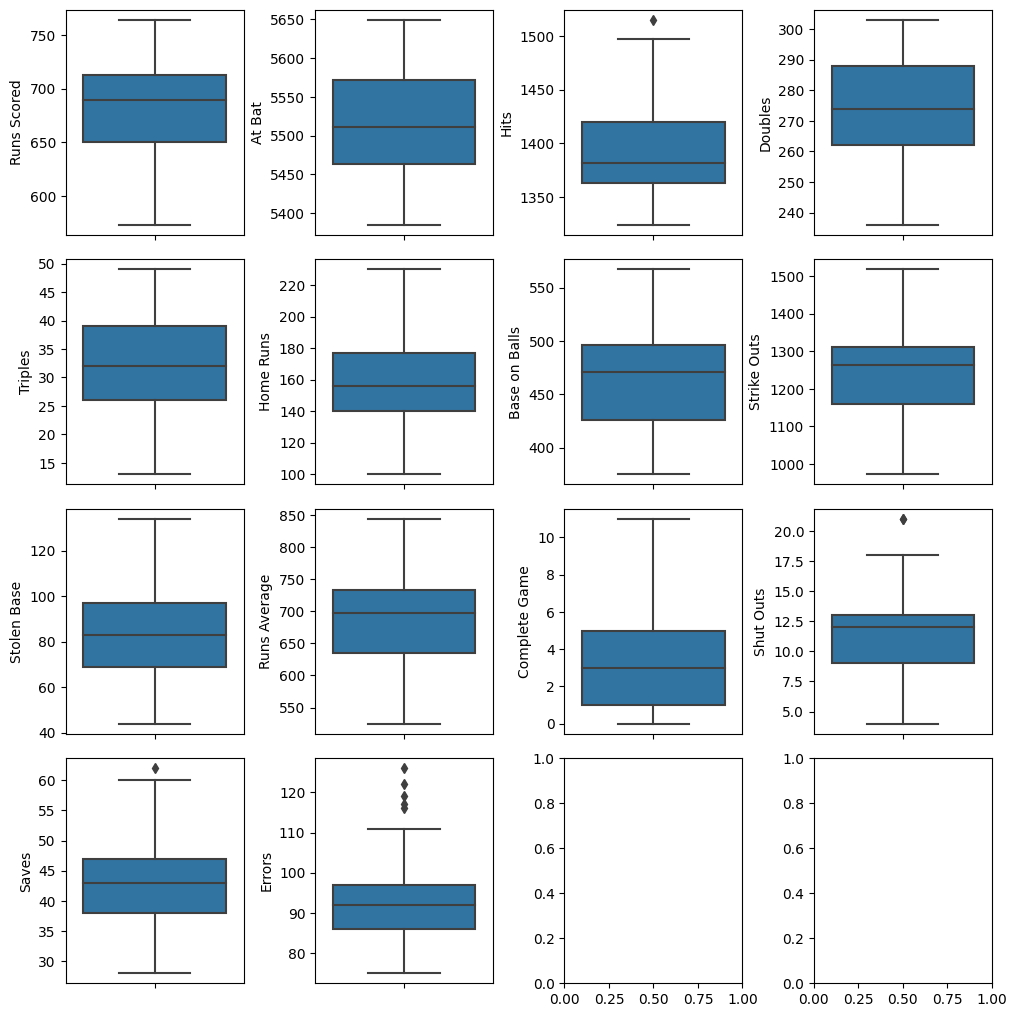

In [36]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

- The above data shows that the Dataset still has Outliers present 
- Since the size of Dataset is too small we will not remove any more Data to avoid Data loss.

- Lets Check the Skewness of the Dataset to be sure

### Skewness

In [37]:
df.skew()

Wins             0.119013
Runs Scored     -0.215364
At Bat           0.169573
Hits             0.783772
Doubles         -0.335304
Triples          0.090124
Home Runs        0.450862
Base on Balls    0.151193
Strike Outs     -0.233815
Stolen Base      0.494966
Runs Average     0.018155
Complete Game    0.854980
Shut Outs        0.526943
Saves            0.627480
Errors           0.840271
dtype: float64

- The skewness is greatly reduced compared to before we tested
- There are still few columns which have slightly higher skewness but they are within the accepatable range

- We can check it again using the Distribution Plot

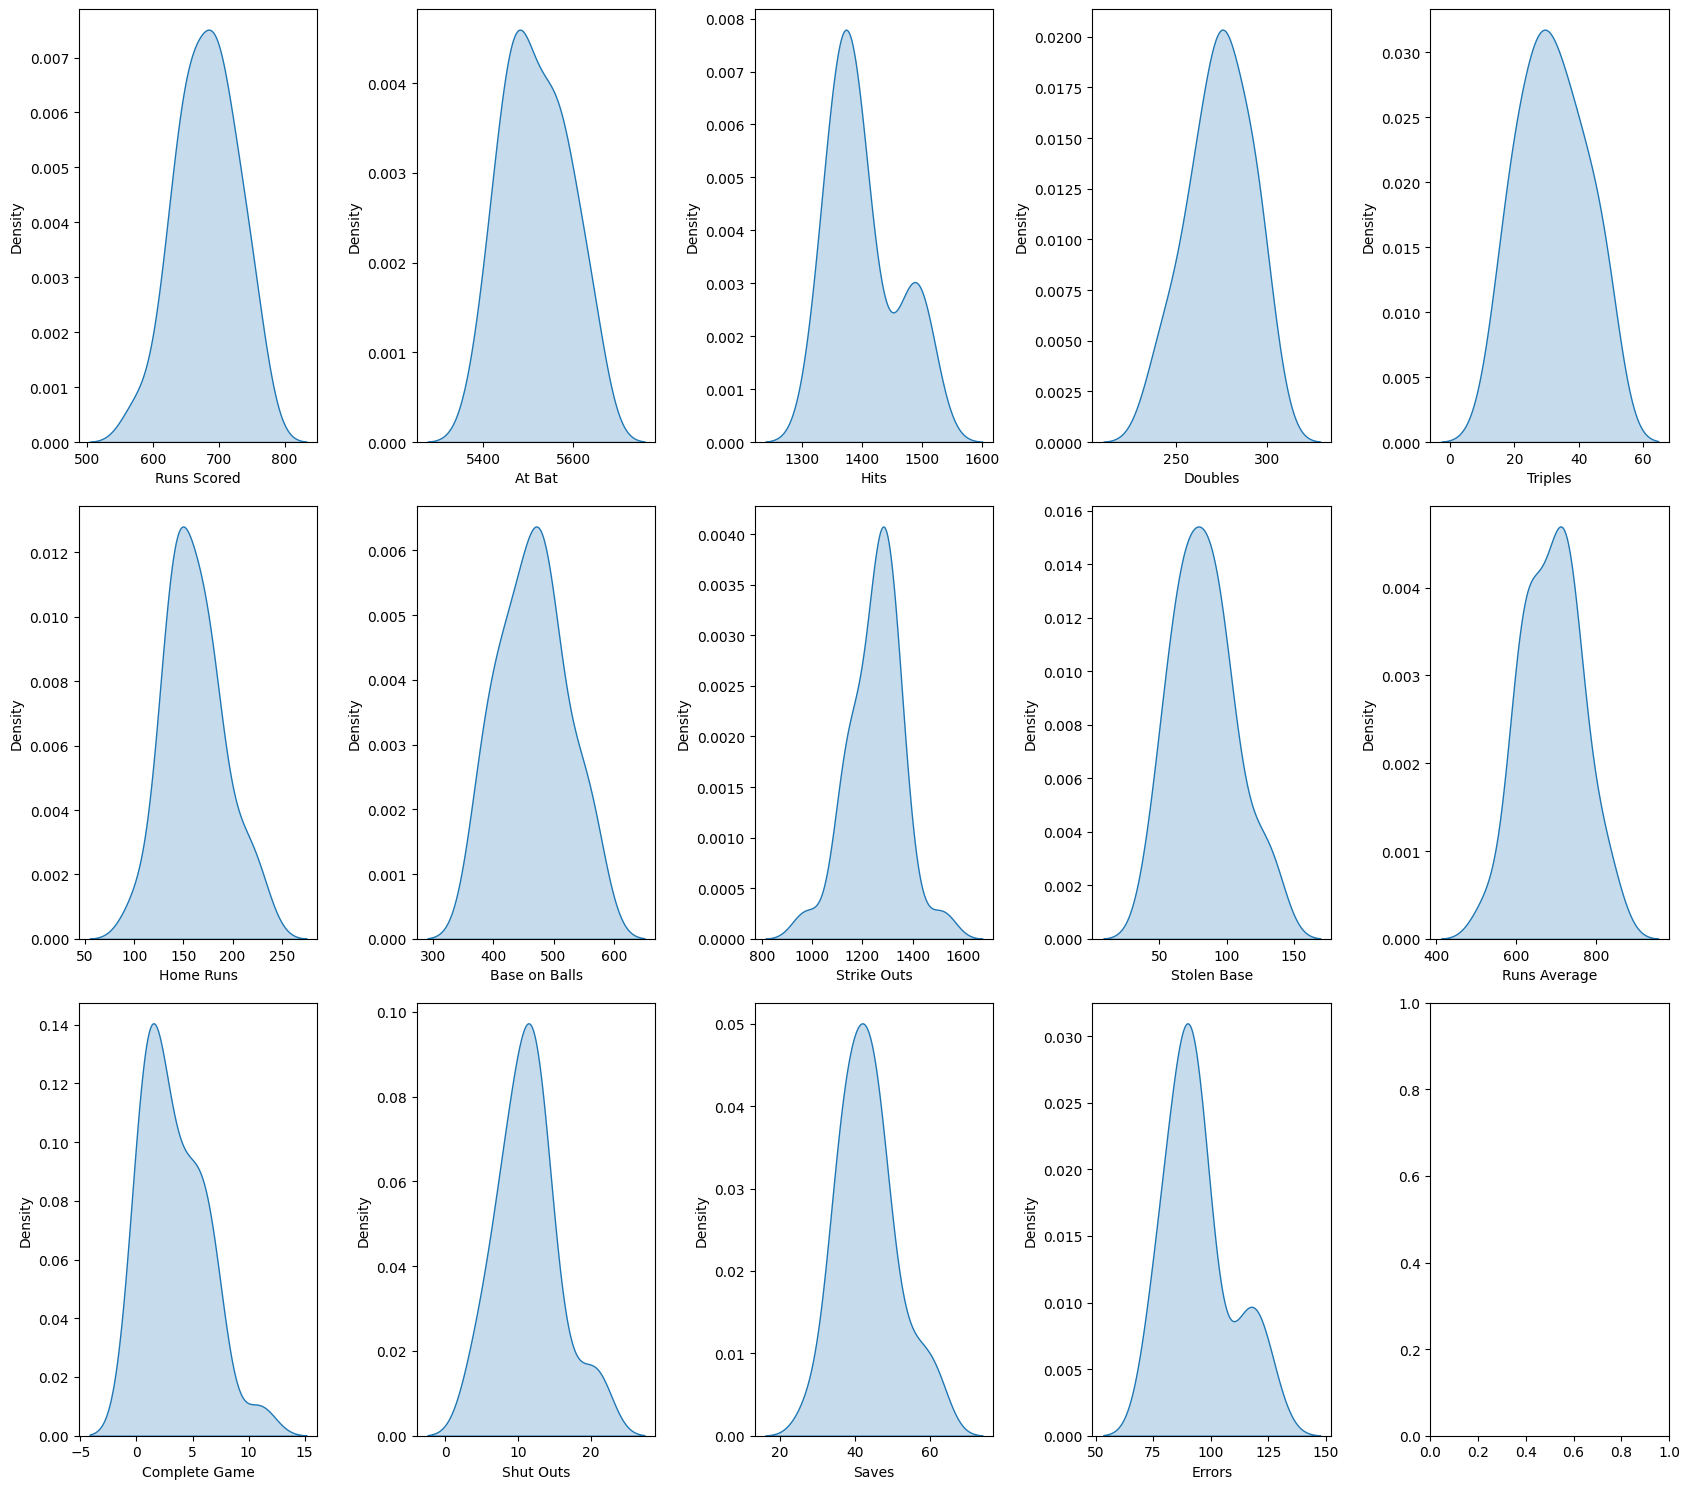

In [38]:
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(17,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.distplot(value, ax=ax[index], hist=False, kde_kws={"shade": True})
    index += 1
plt.tight_layout()
plt.show()

- From the above Visulisation it can be concluded that all features are showing Normal Distribution which indicates that the Dataset is Normalized

### Splitting the Dataset into two (i.e Indpendent(X) and Dependent(y) features)

In [39]:
X = df.drop('Wins', axis=1)
y = df.Wins

In [40]:
X.head()

Runs Scored  At Bat  Hits  Doubles  Triples  Home Runs  Base on Balls  \
0          724    5575  1497      300       42        139            383   
1          696    5467  1349      277       44        156            439   
2          669    5439  1395      303       29        141            533   
3          622    5533  1381      260       27        136            404   
4          689    5605  1515      289       49        151            455   

   Strike Outs  Stolen Base  Runs Average  Complete Game  Shut Outs  Saves  \
0          973          104           641              2          8     56   
1         1264           70           700              2         12     45   
2         1157           86           640             11         10     38   
3         1231           68           701              7          9     37   
4         1259           83           803              7         12     35   

   Errors  
0      88  
1      86  
2      79  
3     101  
4      86

In [42]:
y.head()

0    95
1    83
2    81
3    76
4    74
Name: Wins, dtype: int64

In [43]:
X.shape

(29, 14)

In [44]:
y.shape

(29,)

### Feature Scaling

- We will use StandardScaler to scale the Dataset to ensure that there is no issue with the data biasness over a particular feature

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [46]:
X.head()

Runs Scored    At Bat      Hits   Doubles   Triples  Home Runs  \
0     0.959398  0.830084  1.738306  1.556538  1.010845  -0.765863   
1     0.331147 -0.702831 -0.938698  0.201171  1.208917  -0.181389   
2    -0.274666 -1.100253 -0.106656  1.733325 -0.276617  -0.697101   
3    -1.329231  0.233951 -0.359886 -0.800621 -0.474688  -0.869006   
4     0.174084  1.255894  2.063888  0.908319  1.704094  -0.353293   

   Base on Balls  Strike Outs  Stolen Base  Runs Average  Complete Game  \
0      -1.536359    -2.727623     0.905953     -0.664514      -0.501486   
1      -0.495021     0.121896    -0.585315      0.154638      -0.501486   
2       1.252941    -0.925866     0.116458     -0.678397       2.854612   
3      -1.145857    -0.201246    -0.673037      0.168522       1.363013   
4      -0.197495     0.072935    -0.015124      1.584683       1.363013   

   Shut Outs     Saves    Errors  
0  -0.813262  1.643157 -0.471091  
1   0.159299  0.211006 -0.614898  
2  -0.326982 -0.700362 -1.118222  
3  -0.570122 -0.830557  0.463653  
4   0.159299 -1.090948 -0.614898

### Principle Component Analysis

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=14, svd_solver="full")
X = pd.DataFrame(pca.fit_transform(X), columns=X.columns)

In [48]:
X.head()

Runs Scored    At Bat      Hits   Doubles   Triples  Home Runs  \
0    -2.957996 -0.953253  2.246316 -1.216994 -2.357314   0.016125   
1     0.240394  0.417411  0.313526 -0.266703 -0.294763   0.504699   
2     0.474141 -1.106621  0.911147  3.099281 -0.796596  -0.762581   
3    -0.109473  1.848198  0.163538  1.093046  0.300077  -1.019805   
4    -2.909976 -0.777732 -0.319362  1.853279 -0.148994   0.213535   

   Base on Balls  Strike Outs  Stolen Base  Runs Average  Complete Game  \
0       0.626783     0.394846     0.882534      0.554004      -0.258275   
1      -0.962596     1.240400     0.256176     -0.827710       0.332404   
2       1.542021     1.355597    -0.235204      0.159777       0.549155   
3      -0.127039     0.024300    -0.562258      1.324900      -0.151055   
4      -1.046595     0.188747    -1.268692     -0.264274      -0.364419   

   Shut Outs     Saves    Errors  
0  -0.218896 -0.176119  0.192275  
1  -0.199270 -0.010978  0.486047  
2   0.082016  0.205976 -0.116133  
3  -0.102882  0.737932  0.222658  
4   0.118457 -0.147223 -0.268420

- PCA can also help in reducing the Skewness of the Dataset 
- It can also help in reducing the number of columns when one-hot encoding is used to avoid large number of columns

### Power Transformation

In [50]:
from sklearn.preprocessing import PowerTransformer
transform = PowerTransformer(method = 'yeo-johnson')
X = pd.DataFrame(transform.fit_transform(X), columns=X.columns)

In [51]:
X.head(10)

Runs Scored    At Bat      Hits   Doubles   Triples  Home Runs  \
0    -1.531314 -0.498970  1.648944 -1.012066 -2.313643   0.160763   
1     0.107095  0.491777  0.264410 -0.152456 -0.222672   0.618698   
2     0.231348 -0.637813  0.701913  2.267201 -0.705892  -0.741631   
3    -0.077322  1.155694  0.152658  0.908262  0.317725  -1.081383   
4    -1.507223 -0.346199 -0.214158  1.442298 -0.086620   0.354539   
5     0.334721 -0.920914 -1.898773 -0.777902 -1.647266  -1.218018   
6     1.027540  0.787104 -1.585944 -1.051603 -1.650175   0.860395   
7     0.480910  0.201045  0.908332 -1.624805  0.196177   0.656288   
8    -1.242640 -0.949294 -0.449948  0.043601 -1.077768  -1.281211   
9    -0.479206 -0.647799 -0.870502 -0.066799  0.589530  -1.119003   

   Base on Balls  Strike Outs  Stolen Base  Runs Average  Complete Game  \
0       0.858484     0.615354     1.330458      1.040373      -0.514105   
1      -1.355468     1.627497     0.506216     -1.732195       0.707081   
2       1.791532     1.755747    -0.285770      0.395032       1.130860   
3      -0.067982     0.116307    -0.903286      2.107384      -0.284258   
4      -1.497998     0.343404    -2.446157     -0.425055      -0.744902   
5       1.274056    -0.601532     0.273842     -1.381634      -0.562001   
6      -1.952420    -0.606167    -0.226670      0.682387       0.455062   
7       0.297876     0.998391    -0.745228      0.631872      -1.465975   
8      -0.478003    -1.267010    -0.303047     -0.668205       0.743058   
9       1.033087     0.572677     1.713964     -0.186051      -1.774019   

   Shut Outs     Saves    Errors  
0  -0.560659 -0.467027  0.926858  
1  -0.507797  0.121365  2.093866  
2   0.236013  0.754554 -0.513110  
3  -0.249929  1.884386  1.055454  
4   0.330416 -0.356914 -1.324429  
5  -0.374556  1.814975 -0.060628  
6   0.592304  0.447967  0.044761  
7  -0.995567 -1.159171 -0.668680  
8   0.450942 -0.897050  0.195479  
9   1.235321 -1.001225  0.745612

- Power Transformation can be used to handle Outliers as well

### Variance Inflation Factor(VIF)

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features List"]=X.columns
vif_data["VIF Value"]=[variance_inflation_factor(X.values, i)
                       for i in range(len(X.columns))]

In [53]:
vif_data

Features List  VIF Value
0     Runs Scored   1.006200
1          At Bat   1.017150
2            Hits   1.005998
3         Doubles   1.007102
4         Triples   1.005601
5       Home Runs   1.011452
6   Base on Balls   1.013386
7     Strike Outs   1.007557
8     Stolen Base   1.010934
9    Runs Average   1.002451
10  Complete Game   1.004545
11      Shut Outs   1.008313
12          Saves   1.017913
13         Errors   1.007034

- The Value 10 in VIF indicates a very high correlation but since we have all VIF score within and acceptable range we can proceed to Build ML model

## Train Test Split

- Before we proceed to model building we need to find the best random state for better accuracy
- we will use Linear Regression Algorithm to get the best random state
- We will use the metrics r2_score to get the accuracy of the model

In [58]:
## Imoprting Libraires for Linear Regression and Metrics to evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(y_test, pred)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.9698064811208986 on Random State 99


- From the above we can conclude that the best random state is '99'

- We will perform Train test split again using the best random state

- We will be taking 80 percent of the Data for training and 20 percent of data for testing

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=99)

### Model Selection

- We will test our data with many ML algorithms and conclude which algorithm performs the best 

In [61]:
## Importing the ML models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

- We will need performance Metrics to evaluate the performance of the models

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

- We will make a function to train test split in dependent and indepedent features and then train the model while predicting the 'Wins' 
- The function will caluclate the RMSE score , r2_score , calculates the Cross-Validation score and in the end it will Calculate the Difference between the r2_score and Cross-Validation score.

In [63]:
## Creating a function to make training easier

def Wins_prediction(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=99)
    
    # Model Training
    model.fit(X_train, y_train)
    
    # Predicting Value using X_test
    y_pred = model.predict(X_test)
    
    # Calucalting the RMSE Score (The Lower the score the Better)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # Calcualting the R2_score
    r2 = r2_score(y_test, y_pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Calculating the Cross Validation Score (The value of cv will be 5)
    Cross_Val_score = (cross_val_score(model, X, y, cv=5).mean())*100
    print("Cross Validation Score:", Cross_Val_score)
    
    # Difference between the r2 score and Cross_vaL_score
    result = r2 - Cross_Val_score
    print("R2 Score - Cross Validation Score is", result)

- The First model we will use will be Linear Regression

### Linear Regression

In [64]:
model=LinearRegression()
Wins_prediction(model, X, y)

RMSE Score is: 2.146203402937023
R2 Score is: 96.98064811208987
Cross Validation Score: 23.061116601063176
R2 Score - Cross Validation Score is 73.91953151102669


### Ridge Regression 

In [66]:
model=Ridge()
Wins_prediction(model, X, y)

RMSE Score is: 2.6406916839079937
R2 Score is: 95.42904055898416
Cross Validation Score: 28.93967305201256
R2 Score - Cross Validation Score is 66.4893675069716


### Lasso Regression

In [67]:
model=Lasso()
Wins_prediction(model, X, y)

RMSE Score is: 5.83346726367831
R2 Score is: 77.69380459958785
Cross Validation Score: 1.5406188201464288
R2 Score - Cross Validation Score is 76.15318577944142


### Support Vector Machine (SVR)

In [68]:
model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
Wins_prediction(model, X, y)

RMSE Score is: 12.277321444683302
R2 Score is: 1.1949310484541398
Cross Validation Score: -44.952270380446656
R2 Score - Cross Validation Score is 46.14720142890079


### Decsion Tree Regressor 

In [69]:
model = DecisionTreeRegressor(criterion="poisson")
Wins_prediction(model, X, y)

RMSE Score is: 9.513148795220223
R2 Score is: 40.67734887108521
Cross Validation Score: -136.28819646053392
R2 Score - Cross Validation Score is 176.96554533161913


### Random Forest Regressor

In [70]:
model = RandomForestRegressor(max_depth=2, max_features="sqrt")
Wins_prediction(model, X, y)

RMSE Score is: 11.090043647039701
R2 Score is: 19.380800230210426
Cross Validation Score: -7.532666406999974
R2 Score - Cross Validation Score is 26.913466637210398


### K Neighbours Regressor

In [72]:
model = KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
Wins_prediction(model, X, y)

RMSE Score is: 9.912113800799505
R2 Score is: 35.597232337946096
Cross Validation Score: -140.21799647293753
R2 Score - Cross Validation Score is 175.81522881088364


### AdaBoost Regressor

In [73]:
model = AdaBoostRegressor(n_estimators=300, learning_rate=1.05)
Wins_prediction(model, X, y)

RMSE Score is: 9.156171469115222
R2 Score is: 45.045937090563996
Cross Validation Score: -38.04692559199595
R2 Score - Cross Validation Score is 83.09286268255994


### Gradient Boosting Regressor

In [75]:
model = GradientBoostingRegressor()
Wins_prediction(model, X, y)

RMSE Score is: 8.521597730828212
R2 Score is: 52.39922425531618
Cross Validation Score: -77.37081849124291
R2 Score - Cross Validation Score is 129.77004274655908


### Extra-Tree Regressor

In [76]:
model = ExtraTreesRegressor()
Wins_prediction(model, X, y)

RMSE Score is: 8.586150670313986
R2 Score is: 51.67532046613257
Cross Validation Score: -4.335380203476265
R2 Score - Cross Validation Score is 56.01070066960883


### From the Above Evaluations we can conclude that Linear Regression is the best model for training the Dataset

- we will perform Hyper parameter Tuning on the Best Model

### Hyperparameter Tuning

In [81]:
param_grid = {'fit_intercept' : [True, False],
              'copy_X' : [True, False],
              'positive' : [True, False],
              'n_jobs' : [-2, -1, 1]
             }

- Since there are not many parmaters to we will proceed with above

- We will use GridSearchCV to Tune our Model

In [82]:
Grid_Search = GridSearchCV(LinearRegression(), param_grid, cv=5)
Grid_Search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [-2, -1, 1],
                         'positive': [True, False]})

In [83]:
## To identify the best paramters according to GridSearchCV
Grid_Search.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -2, 'positive': False}

### Final Model using the Best Parameters

In [84]:
Final_Model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs= -2,positive=True)
Classifier = Final_Model.fit(X_train, y_train)
final_pred = Final_Model.predict(X_test)
final_r2_score = r2_score(y_test, final_pred)*100
print("R2 score for the Final Model :", final_r2_score)

R2 score for the Final Model : -0.8429761850601292


### Saving the Best Model

In [85]:
import joblib
filename = "Baseball_win_predciton.pkl"
joblib.dump(Final_Model, filename)

['Baseball_win_predciton.pkl']

- Saving the model for future Predictions using Joblib library